In [1]:
pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from pmdarima.metrics import smape
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import pickle

# Step 2: Data Preprocessing

# Step 3: EDA and Visualization

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results

In [3]:
df2 = pd.read_csv('2016_2021.csv')
df2.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,8A78B2AF-785C-5CB0-E053-6B04A8C0F504,140000,24/05/2019,E1 0AD,F,N,L,FLAT 6,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,B0A9D11B-5E60-4C1F-E053-6C04A8C0D716,325000,13/08/2020,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [8]:
df2[['zip','Last']] = df2.postcode.str.split(" ",expand=True,)
df2.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,Unnamed: 16,Unnamed: 17,zip,Last
0,8A78B2AF-785C-5CB0-E053-6B04A8C0F504,140000,24/05/2019,E1 0AD,F,N,L,FLAT 6,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AD
1,B0A9D11B-5E60-4C1F-E053-6C04A8C0D716,325000,13/08/2020,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AD
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AD
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AE
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,NaN,NaN,E1,0AE


In [9]:
df2.deed_date.dtype

dtype('O')

In [19]:
df2['Month'] = pd.DatetimeIndex(df2['deed_date'])
df2['month_year'] = pd.to_datetime(df2['Month']).dt.to_period('M')

In [29]:
grouped_multiple = df2.groupby(['district', 'zip', 'month_year']).agg({'price_paid': ['mean', 'min', 'max', percentile(10), percentile(90)]})

In [32]:
grouped_multiple.tail(25)

shift - baseline model 
prediction just on indogenous data for one borough
non dynamic predict vs random walk
dynamic predict
1 year
experiment with differencing to see which will give best stationarity
interpolate between missing months
forward interpolation - no data leakage.
pandas.dataframe.interpolate method

price_paid                                  \
                                   mean     min       max percentile_10   
district   zip month_year                                                 
WANDSWORTH SW8 2019-06     6.343750e+05  562500    785000      570750.0   
               2019-07     5.990000e+05  236500    935000      335750.0   
               2019-08     5.742944e+05  148000    795000      424250.0   
               2019-09     5.995000e+05  355000    917000      395000.0   
               2019-10     7.065238e+05  390000   1045000      410900.0   
               2019-11     2.521246e+06  302000  36160125      394000.0   
               2019-12     6.591586e+05  325220    915000      431400.0   
               2020-01     5.822222e+05  350000   1000000      350000.0   
               2020-02     5.172273e+05   32000   1110000      175000.0   
               2020-03     8.119000e+05  200000   2750000      250350.0   
               2020-04     1.234167e+06  500000   4550000      530000.0   
               2020-05     4.871250e+05  328500    645000      357450.0   
               2020-06     6.539167e+05  500000   1030000      529250.0   
               2020-07     6.149286e+05  350000    930000      414500.0   
               2020-08     5.570000e+05   14000   1250000      230600.0   
               2020-09     6.654000e+05  347000    925000      404200.0   
               2020-10     5.884091e+05  325000    955000      408500.0   
               2020-11     6.900000e+05  347000   1200000      389600.0   
               2020-12     9.336667e+05  370000   2700000      455000.0   
               2021-01     6.225000e+05  535000    698000      559000.0   
               2021-02     6.362500e+05  450000    965000      459000.0   
               2021-03     4.906250e+05  356250    625000      383125.0   
               2021-04     6.350000e+05  620000    650000      623000.0   
               2021-05     7.175000e+05  715000    720000      715500.0   
               2021-12     5.590000e+05  559000    559000      559000.0   

                                         
                          percentile_90  
district   zip month_year                
WANDSWORTH SW8 2019-06         729500.0  
               2019-07         907500.0  
               2019-08         751950.0  
               2019-09         838500.0  
               2019-10         949500.0  
               2019-11         947413.0  
               2019-12         865500.0  
               2020-01         908000.0  
               2020-02        1000000.0  
               2020-03        1046000.0  
               2020-04        2605000.0  
               2020-05         616500.0  
               2020-06         847500.0  
               2020-07         852000.0  
               2020-08         992000.0  
               2020-09         875000.0  
               2020-10         920000.0  
               2020-11        1071000.0  
               2020-12        1727500.0  
               2021-01         681200.0  
               2021-02         870500.0  
               2021-03         598125.0  
               2021-04         647000.0  
               2021-05         719500.0  
               2021-12         559000.0

In [4]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [3]:
import numpy as np

# Import the Data

As the datasets were so large, it took time to download and the website would regularly time out when trying to run large queries. As a result I downloaded the data in time segments. I will now put them all together.

In [4]:
df2000_2002 = pd.read_csv('2000_2002.csv')
df2002_2006 = pd.read_csv('2002_2006.csv')
df2006_2011 = pd.read_csv('2006_2011.csv')
df2011_2016 = pd.read_csv('2011_2016.csv')
df2016_2021 = pd.read_csv('2016_2021.csv')

create a list of the dfs, this may be useful to explore the datasets and ensure I can append them.

In [5]:
dfs = [df2016_2021, df2011_2016, df2006_2011, df2002_2006, df2000_2002]

for df in dfs:
    print(df.shape)

(338887, 16)
(340644, 16)
(350267, 16)
(367691, 16)
(192195, 16)


great, it looks like there are equal number of columns in each dataframe, this should make adding them together relatively simple. 

In [6]:
df2002_2006.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,3A04074C-AC1A-46D7-BD91-FBF7501BAD44,173500,28/10/2004,E1 0AE,F,N,L,NaN,324,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,262FFF4F-0AFC-469E-9C41-BC09FE43F210,171000,16/08/2005,E1 0AE,F,N,L,NaN,326,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,D3B8DD42-1C71-4551-ACB9-A4C04126AEE7,177000,25/10/2004,E1 0AE,F,N,L,NaN,330,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,6DA08449-D140-30F2-E053-6B04A8C05F3B,157500,06/02/2003,E1 0AE,F,N,L,NaN,332,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,261DD75C-2E11-46D7-83AF-C35B100F1B4E,169000,01/07/2004,E1 0AE,F,N,L,NaN,340,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [7]:
df2006_2011.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,DF33AD88-E093-4796-B42C-9A10B910D743,115500,16/03/2007,E1 0AD,F,Y,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,00E7F6C2-3F26-4123-8475-FA697F239A09,105000,16/03/2007,E1 0AD,F,Y,L,FLAT 5,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8A87041C-93CB-497A-B8E6-56FFEE2552E3,102000,12/03/2007,E1 0AD,F,Y,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,35CDF0A7-1550-4555-801A-46DDC0B7171A,150000,11/05/2007,E1 0AD,F,Y,L,FLAT 9,"BILL FAUST HOUSE, 20",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,9021C9C5-FCCD-4203-B43A-2E8BDBA322E0,97500,15/03/2007,E1 0AD,F,N,L,FLAT 1,"ADAM MEERE HOUSE, 24",TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [8]:
df2011_2016.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,CFC960FB-CFB4-4CFB-BDF5-138EF6ECB21B,129500,27/05/2011,E1 0AD,F,N,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,08/07/2014,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,4123F148-7A6C-4A7D-BBBF-739540D9F688,210000,01/12/2011,E1 0AD,F,N,L,FLAT 8,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,2479F407-6623-4468-B4EE-436C7F00E0C7,250000,17/06/2011,E1 0AD,F,N,L,FLAT 9,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,1570B1D0-C6DD-4B0C-9645-2B3D3A934C8C,249995,29/06/2012,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [9]:
df2016_2021.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,8A78B2AF-785C-5CB0-E053-6B04A8C0F504,140000,24/05/2019,E1 0AD,F,N,L,FLAT 6,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,B0A9D11B-5E60-4C1F-E053-6C04A8C0D716,325000,13/08/2020,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [10]:
df2000_2002.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,10BACA68-F56C-47CE-906B-4D9CD4FEF39A,123000,27/01/2000,E1 0AF,F,N,L,NaN,408,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,F6339A0D-34F8-44DD-AC6B-AE266FC884EE,80000,28/09/2001,E1 0AJ,F,N,L,FLAT 8,DONOVAN HOUSE,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,73441E21-34A6-444A-B5DA-310A673CC3F6,60000,21/06/2000,E1 0AR,F,N,L,FLAT 12,MOORE HOUSE,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,1C1202B4-E202-45B7-B7B3-BFA7A1A1E05B,61000,18/02/2000,E1 0AU,F,N,L,FLAT 29,GOSLING HOUSE,SUTTON STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,B81AB99F-86F1-4E82-8622-1F26359BD594,73500,12/04/2001,E1 0AZ,F,N,L,FLAT 32,FOLEY HOUSE,TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


all the columns are the same, these dataframes can just be appended. 

In [11]:
new = df2000_2002.append(df2002_2006)
new = new.append(df2006_2011)
new = new.append(df2011_2016)
new = new.append(df2016_2021)
new.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data
0,10BACA68-F56C-47CE-906B-4D9CD4FEF39A,123000,27/01/2000,E1 0AF,F,N,L,NaN,408,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,F6339A0D-34F8-44DD-AC6B-AE266FC884EE,80000,28/09/2001,E1 0AJ,F,N,L,FLAT 8,DONOVAN HOUSE,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,73441E21-34A6-444A-B5DA-310A673CC3F6,60000,21/06/2000,E1 0AR,F,N,L,FLAT 12,MOORE HOUSE,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,1C1202B4-E202-45B7-B7B3-BFA7A1A1E05B,61000,18/02/2000,E1 0AU,F,N,L,FLAT 29,GOSLING HOUSE,SUTTON STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,B81AB99F-86F1-4E82-8622-1F26359BD594,73500,12/04/2001,E1 0AZ,F,N,L,FLAT 32,FOLEY HOUSE,TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [12]:
new.shape

(1589684, 16)

This has been successful, I will now continue with data cleaning and inspection, first though, a description of what these features mean and are they important i.e can I drop them now?

 - unique_id: this is just the id number for the transaction
 - price_paid: In Pound Sterling
 - deed_date: date of completion
 - property_type: detached, semi-detached, terraced or flat maissonette
 - new_build: yes or no
 - estate_type: leasehold or freehold
 - saon: secondary addressable object name, if there is a building that is subdivided into flats for example, there will be an saon.
 - paon: primary addressable object name (typically the house number or name)
 - street: street name
 - locality: in this instance will be London
 - town: if applicable, more granular detail than London could be given
 - district: should represent the Borough.
 - county: greater london in this project
 - transaction_category: standard or additional
 - linked_data: url to transaction information

It looks like many of these columns can be dropped as they will not be particularly useful and the information is often provided in another feature. For example locality and town are similar. Before dropping, I will check for duplicates and null values

In [13]:
for col in new.columns:
    print(col)
    print(new[col].isna().sum())

unique_id
0
price_paid
0
deed_date
0
postcode
3968
property_type
0
new_build
0
estate_type
0
saon
892587
paon
18
street
858
locality
895989
town
0
district
0
county
0
transaction_category
0
linked_data
0


Since I want to ensure I have captured all of the Boroughs, I will do some EDA on this feature now. 

<AxesSubplot:title={'center':'Quantity House Sales by Borough since January 2000'}>

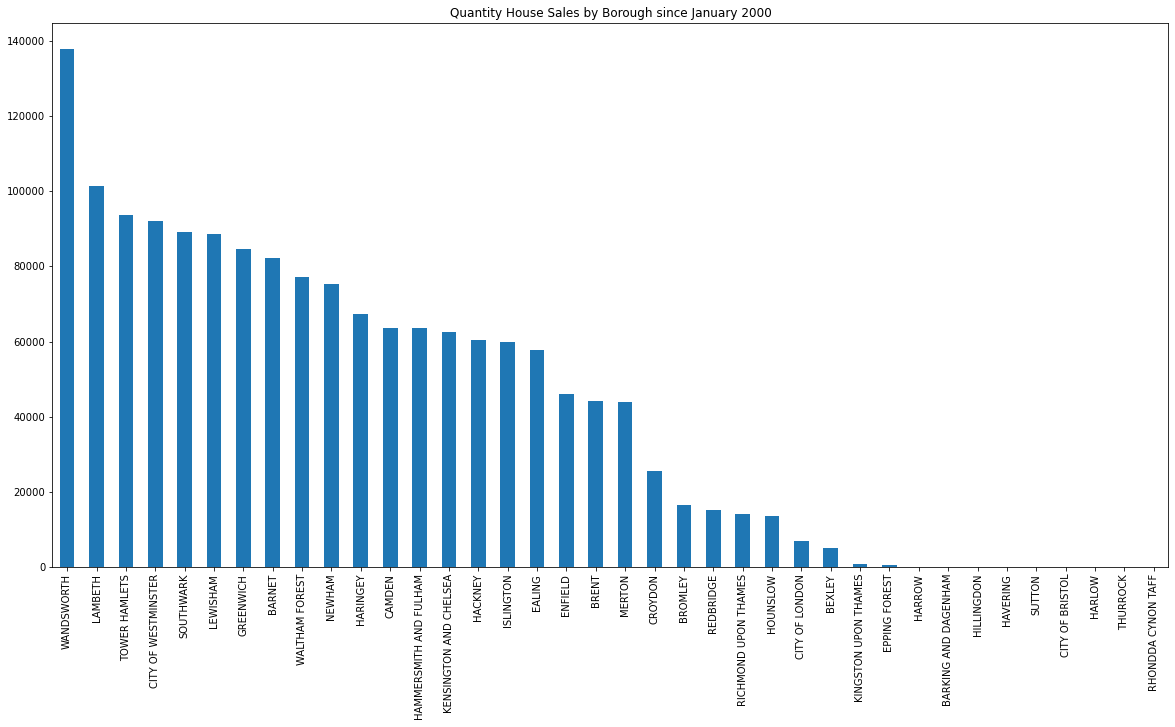

In [14]:
plt.figure(figsize=(20,10))
new['district'].value_counts().plot(kind='bar', title='Quantity House Sales by Borough since January 2000')

It appears that there are some Boroughs that have not been well captured by my initial search. I will run another query for these Boroughs separately and append this data. It is important to capture as much data as possible, but if there is sufficient data for a given Borough I will not re-run the query for it indivually (i.e Wandsworth) 

Another thing, are all of these actually Boroughs of London? No.

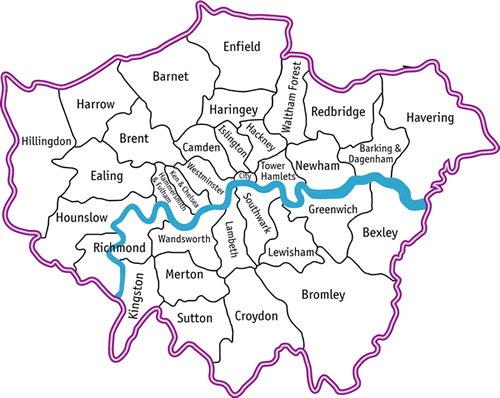

There are 32 local authority boroughs in London, plus the City of London which provides the same services as a Borough but to a much smaller area. For the purposes of this project, I will be treating the City of London as a Borough.

In [15]:
boroughs = [
        'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent',
        'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
        'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
        'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
        'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
        'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
        'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster', 'City of London'
    ]

for i in range(len(boroughs)):
    boroughs[i] = boroughs[i].lower()

boroughs


['barking and dagenham',
 'barnet',
 'bexley',
 'brent',
 'bromley',
 'camden',
 'croydon',
 'ealing',
 'enfield',
 'greenwich',
 'hackney',
 'hammersmith and fulham',
 'haringey',
 'harrow',
 'havering',
 'hillingdon',
 'hounslow',
 'islington',
 'kensington and chelsea',
 'kingston upon thames',
 'lambeth',
 'lewisham',
 'merton',
 'newham',
 'redbridge',
 'richmond upon thames',
 'southwark',
 'sutton',
 'tower hamlets',
 'waltham forest',
 'wandsworth',
 'westminster',
 'city of london']

In [16]:
for i in new['district'].unique():
    i = i.lower()
    if i not in boroughs:
        print(i)

epping forest
city of westminster
thurrock
rhondda cynon taff
harlow
city of bristol


In [17]:
# change the name of city of westminster to westminster
new['district'] = new['district'].replace('CITY OF WESTMINSTER', 'WESTMINSTER')

In [18]:
not_boroughs = []
for i in new['district'].unique():
    
    i = i.lower()
    if i not in boroughs:
        not_boroughs.append(i.upper())
        print(i)

epping forest
thurrock
rhondda cynon taff
harlow
city of bristol


In [19]:
not_boroughs

['EPPING FOREST',
 'THURROCK',
 'RHONDDA CYNON TAFF',
 'HARLOW',
 'CITY OF BRISTOL']

I will delete these entries from the dataset.

In [20]:
# remove rows with district values that are not boroughs
new = new[~new['district'].isin(not_boroughs)]



In [21]:
for i in new['district'].unique():
    i = i.lower()
    if i not in boroughs:
        print(i)

<AxesSubplot:title={'center':'Quantity House Sales by Borough since January 2000'}>

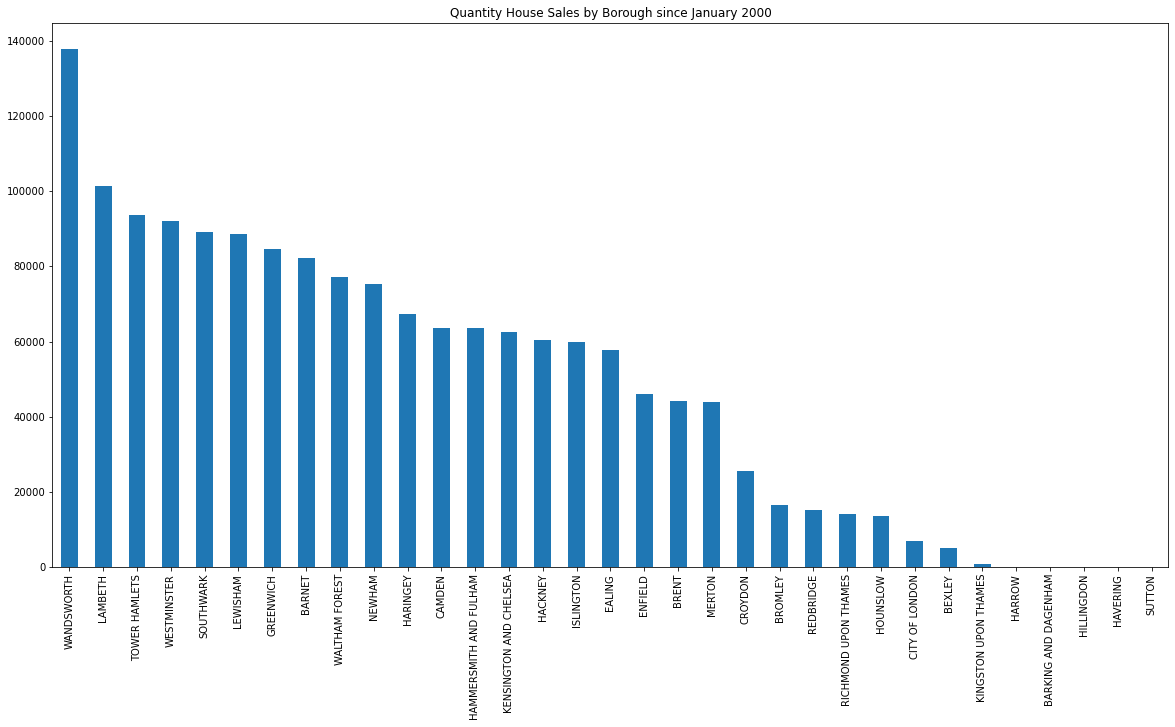

In [22]:
# I will now review the counts again, see where this dataset stands
plt.figure(figsize=(20,10))
new['district'].value_counts().plot(kind='bar', title='Quantity House Sales by Borough since January 2000')

In [23]:
len(new['district'].value_counts())

33

There is now all the boroughs there but some of them are poorly represented, I don't believe this is an accurate reflection of house sales in these boroughs so I will run separate queries for these and append the data to the new dataframe.

In [24]:
barking_df = pd.read_csv('barking.csv')
bexley_df = pd.read_csv('bexley.csv')
bromley_df = pd.read_csv('bromley.csv')
croydon_df = pd.read_csv('croydon.csv')
harrow_df = pd.read_csv('harrow_00_21.csv')
havering_df = pd.read_csv('havering.csv')
kingston_df = pd.read_csv('kingston.csv')
hillingdon_df = pd.read_csv('hillingdon.csv')
redbridge_df = pd.read_csv('redbridge.csv')
richmond_df = pd.read_csv('richmond.csv')
sutton_df = pd.read_csv('sutton.csv')
hounslow_df = pd.read_csv('hounslow.csv')

I will now append all this data to the existing dataframe and then remove duplicates

In [25]:
#create a list of dfs to make appending simple.
dfs_to_append = [barking_df, bexley_df, bromley_df, croydon_df, harrow_df, havering_df, kingston_df, hillingdon_df, redbridge_df, richmond_df, sutton_df, hounslow_df]

for i in dfs_to_append:
    new = new.append(i)

new.shape


(2585998, 16)

In [26]:
new.duplicated(subset='unique_id').sum()

90478

In [27]:
new.drop_duplicates(subset=['unique_id'], keep='last', inplace=True)

<AxesSubplot:title={'center':'Quantity House Sales by Borough since January 2000'}>

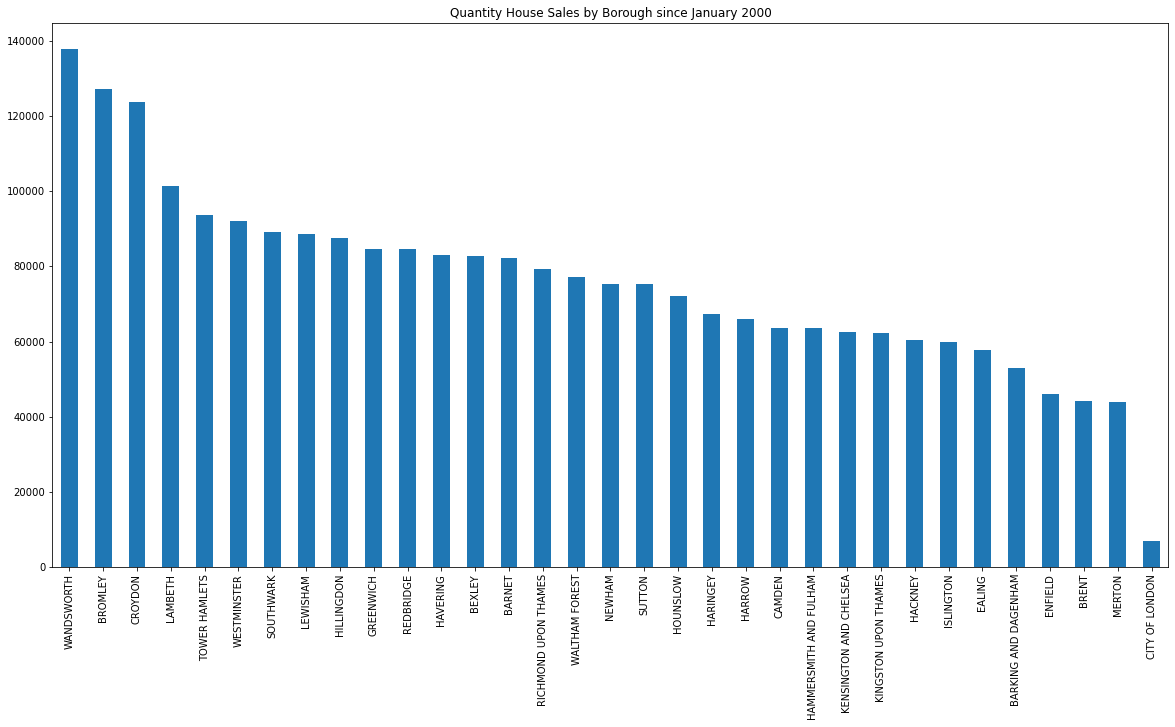

In [28]:
# I will now review the counts again, see where this dataset stands
plt.figure(figsize=(20,10))
new['district'].value_counts().plot(kind='bar', title='Quantity House Sales by Borough since January 2000')

In [29]:
for col in new.columns:
    print(col)
    print(new[col].isna().sum())

unique_id
0
price_paid
0
deed_date
0
postcode
5011
property_type
0
new_build
0
estate_type
0
saon
1624041
paon
39
street
1057
locality
1379534
town
0
district
0
county
0
transaction_category
0
linked_data
0


In [30]:
new.dropna(subset=['postcode'], inplace=True)

In [31]:
for col in new.columns:
    print(col)
    print(new[col].isna().sum())

unique_id
0
price_paid
0
deed_date
0
postcode
0
property_type
0
new_build
0
estate_type
0
saon
1622014
paon
39
street
974
locality
1375453
town
0
district
0
county
0
transaction_category
0
linked_data
0


As I am only interested in the first part of the post code and not going to the next level of detail using the second half, I will create a new column by extracting this information from the post code column.

In [32]:
new[['zip','Last']] = new.postcode.str.split(" ",1, expand=True,)
new.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,zip,Last
0,10BACA68-F56C-47CE-906B-4D9CD4FEF39A,123000,27/01/2000,E1 0AF,F,N,L,NaN,408,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AF
1,F6339A0D-34F8-44DD-AC6B-AE266FC884EE,80000,28/09/2001,E1 0AJ,F,N,L,FLAT 8,DONOVAN HOUSE,CABLE STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AJ
2,73441E21-34A6-444A-B5DA-310A673CC3F6,60000,21/06/2000,E1 0AR,F,N,L,FLAT 12,MOORE HOUSE,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AR
3,1C1202B4-E202-45B7-B7B3-BFA7A1A1E05B,61000,18/02/2000,E1 0AU,F,N,L,FLAT 29,GOSLING HOUSE,SUTTON STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AU
4,B81AB99F-86F1-4E82-8622-1F26359BD594,73500,12/04/2001,E1 0AZ,F,N,L,FLAT 32,FOLEY HOUSE,TARLING STREET,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0AZ


In [33]:
new['Month'] = pd.DatetimeIndex(new['deed_date'])
new['month_year'] = pd.to_datetime(new['Month']).dt.to_period('M')

In [34]:
print(f'We have {new.zip.nunique()} different post codes in our dataset for London.')

We have 300 different post codes in our dataset for London.


In [35]:
new[new['month_year']>'2021-05']

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data,zip,Last,Month,month_year
47,C3C3F9B6-9A45-362B-E053-6B04A8C03ACC,3215000,09/04/2021,E1 0BL,O,N,F,NaN,212,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0BL,2021-09-04,2021-09
84,BEF7EBBF-1C2B-7A76-E053-6B04A8C092F7,630000,08/01/2021,E1 0ED,F,N,F,NaN,30,TARBERT WALK,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0ED,2021-08-01,2021-08
205,C18F412A-B78D-81A6-E053-6B04A8C0AD18,665000,10/03/2021,E1 0NQ,T,N,F,NaN,50,BELGRAVE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0NQ,2021-10-03,2021-10
230,C3C3F9B5-9F64-362B-E053-6B04A8C03ACC,407500,10/02/2021,E1 0QA,F,N,L,NaN,2,OLD CHURCH ROAD,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,0QA,2021-10-02,2021-10
575,C18F412A-B94A-81A6-E053-6B04A8C0AD18,1050000,11/02/2021,E1 2AN,T,N,F,NaN,6,WALDEN STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,E1,2AN,2021-11-02,2021-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71146,C3C3F9B6-0FAA-362B-E053-6B04A8C03ACC,415000,12/03/2021,W4 5RH,F,N,L,FLAT 1,MORTLAKE HOUSE,CHISWICK HIGH ROAD,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5RH,2021-12-03,2021-12
71258,C6209F5E-CFA4-295E-E053-6C04A8C0DDCC,761500,11/03/2021,W4 5SB,F,N,L,GROUND FLOOR FLAT,39,THORNEY HEDGE ROAD,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5SB,2021-11-03,2021-11
71265,C6209F5F-9073-295E-E053-6C04A8C0DDCC,1607000,09/02/2021,W4 5SB,T,N,F,NaN,43,THORNEY HEDGE ROAD,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5SB,2021-09-02,2021-09
71554,C6209F5E-D3F3-295E-E053-6C04A8C0DDCC,405000,09/04/2021,W4 5UW,F,N,L,NaN,24,ALFRED CLOSE,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,W4,5UW,2021-09-04,2021-09


In [36]:
from scipy import stats

new = new[new['price_paid']>10000]

no_outliers = new[(np.abs(stats.zscore(new['price_paid'])) < 3)].copy()

no_outliers = no_outliers[no_outliers['month_year']<'2021-06'].copy()
no_outliers['price_paid'].describe()

## check min - 1 pound for a house?!?!?

count    2.474631e+06
mean     3.989441e+05
std      4.411951e+05
min      1.001100e+04
25%      1.870000e+05
50%      2.800000e+05
75%      4.500000e+05
max      6.520000e+06
Name: price_paid, dtype: float64

In [37]:
new.to_csv('final.csv')
no_outliers.to_csv('no_outliers.csv')

In [38]:

no_outliers['deed_date'] = pd.to_datetime(no_outliers['deed_date'])
s = no_outliers.groupby(['zip',pd.Grouper(key='deed_date', freq='MS')])['price_paid'].mean()

df1 = (s.reset_index(level=0)
        .groupby('zip')['price_paid']
        .apply(lambda x: x.asfreq('MS'))
        .reset_index()
        )

In [39]:
df1.isna().sum()

zip              0
deed_date        0
price_paid    8492
dtype: int64

In [40]:
df1.groupby('zip').head()

,zip,deed_date,price_paid
0,BR1,2000-01-01,188510.882353
1,BR1,2000-02-01,166975.060606
2,BR1,2000-03-01,166774.318182
3,BR1,2000-04-01,184542.528090
4,BR1,2000-05-01,164167.565789
...,...,...,...
71012,WD3,2000-01-01,155000.000000
71013,WD3,2000-02-01,NaN
71014,WD3,2000-03-01,NaN
71015,WD3,2000-04-01,NaN


In [41]:
len(df1)

71268

In [42]:
print(f'We have {df1.zip.nunique()} different post codes in our dataset for London.')

We have 299 different post codes in our dataset for London.


In [43]:
df1.to_csv('df1.csv')

# Auto ARIMA

In [2]:
df1 = pd.read_csv('df1.csv')
df1.drop(columns='Unnamed: 0', inplace=True)
df1.head()

,zip,deed_date,price_paid
0,BR1,2000-01-01,188510.882353
1,BR1,2000-02-01,166975.060606
2,BR1,2000-03-01,166774.318182
3,BR1,2000-04-01,184542.528090
4,BR1,2000-05-01,164167.565789


I will now trial Auto-ARIMA on one zip to check results

In [3]:

br3 = df1[df1['zip']=='BR3'].copy()
br3.drop('zip', axis=1, inplace=True)
br3.columns = ['ds', 'y']
br3.set_index('ds', inplace=True)
br3 = br3.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)
br3_train = br3[br3.index < '2019-12-01']
br3_test = br3[(br3.index >= '2019-12-01') & (br3.index < '2021-05-01')]
br3_val = br3[(br3.index >= '2019-01-01') & (br3.index < '2021-05-01')]
#cbrt_train3 = np.cbrt(br2)

In [4]:
#We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not which is available in the ‘pmdarima’ package.
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(br3)

#From the above, we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

(0.504398791426278, True)

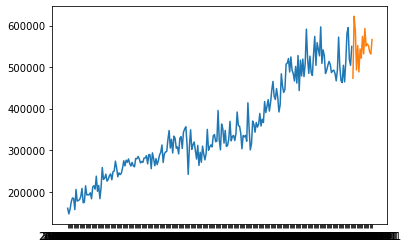

In [7]:
plt.plot(br3_train)
plt.plot(br3_test)

In [17]:
model=auto_arima(br3_train,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5455.998, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5384.692, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5323.839, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5397.415, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5325.667, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5325.661, Time=0.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5354.030, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5327.808, Time=0.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5382.068, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5322.388, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=5396.420, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=5324.140, Time=0.28 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=5324.133, Time=0.90 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=5352.735, Time=0.56 sec
 ARIMA(1,1,1)(1,1,2

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  239
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2655.714
Date:                              Sat, 21 Aug 2021   AIC                           5319.427
Time:                                      16:51:48   BIC                           5333.109
Sample:                                           0   HQIC                          5324.949
                                              - 239                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5227      0.095     -5.493      0.000      -0.709      -0.336
ma.L2         -0.1135      0.094     -1.211      0.226      -0.297       0.070
ma.S.L12      -0.7895      0.082     -9.677      0.000      -0.949      -0.630
sigma2      1.275e+09   2.01e-11   6.33e+19      0.000    1.28e+09    1.28e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                21.92
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               2.50   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+35. Standard errors may be unstable.
"""

In [90]:
len(br3_test)

17

In [10]:
prediction = pd.DataFrame(model.predict(n_periods = len(br3_test)),index=br3_test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
ds,
2019-12-01,566647.379121
2020-01-01,531245.915576
2020-02-01,526292.950558
2020-03-01,526553.219829
2020-04-01,559309.794961
2020-05-01,538007.175842
2020-06-01,555189.584044
2020-07-01,561321.264941
2020-08-01,573416.238005


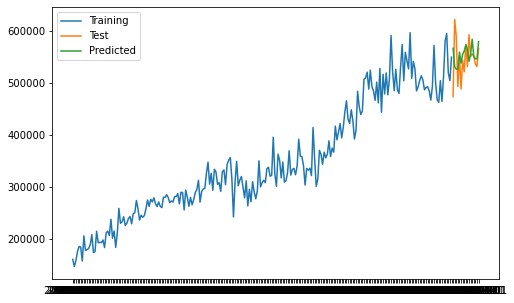

In [11]:
plt.figure(figsize=(8,5))
plt.plot(br3_train,label="Training")
plt.plot(br3_test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
#plt.savefig('SecondPrection.jpg')
plt.show()

In [12]:
br3_test['predicted_price'] = prediction
smape(br3_test['y'], br3_test['predicted_price'])

<ipython-input-12-5753df95daa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br3_test['predicted_price'] = prediction


5.876876743392727

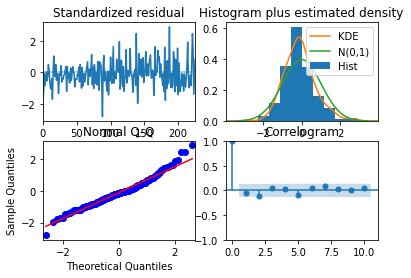

In [20]:
model.plot_diagnostics();

In [23]:
def stationarity_check(ts):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=12, center=False).mean()
    roll_std = ts.rolling(window=12, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [25]:
br3_ave = br3.rolling(window=12, center=False).mean()

In [105]:
br3_ave.tail(12)

,y
ds,
2020-06-01,542549.639664
2020-07-01,537570.968699
2020-08-01,535807.412274
2020-09-01,536894.081281
2020-10-01,544281.454727
2020-11-01,544382.203494
2020-12-01,551230.047364
2021-01-01,545307.092701
2021-02-01,540966.584132


In [28]:
br3ave_train = br3_ave[(br3_ave.index >= '2000-12-01') & (br3_ave.index < '2019-12-01')]
br3ave_test = br3_ave[(br3_ave.index >= '2019-12-01') & (br3_ave.index < '2021-05-01')]

#cbrt_train3 = np.cbrt(br2)

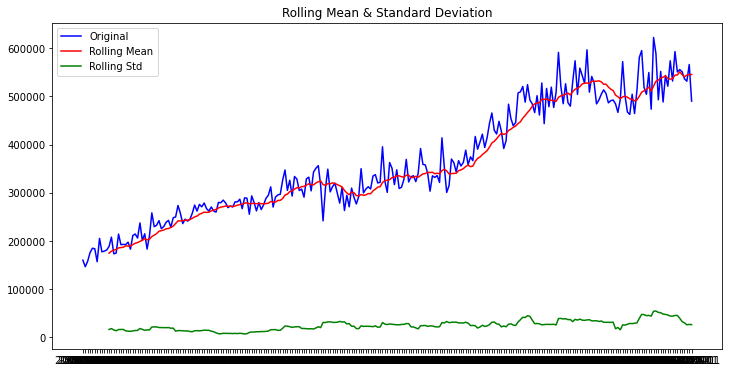


Results of Dickey-Fuller Test: 

Test Statistic                  -0.850292
p-value                          0.803901
#Lags Used                       6.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [24]:
stationarity_check(br3)

In [29]:
model=auto_arima(br3ave_train,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4284.312, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4268.295, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4281.746, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4262.372, Time=0.33 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4259.982, Time=0.82 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4259.876, Time=1.53 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4260.318, Time=3.26 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=4254.726, Time=6.56 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.96 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=4256.502, Time=9.83 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=4256.043, Time=5.43 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=3.24 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=inf, Time=9.02 sec
 ARIMA(0,1,0)(4,1,1)[12]             : 

In [36]:
prediction, conf = model.predict(n_periods = len(br3ave_test), return_conf_int=True)

prediction
conf

array([[514726.70401128, 533803.16903146],
       [511778.88469995, 539610.18742444],
       [507471.85096286, 541942.97133674],
       [502713.02330336, 542739.54667535],
       [500182.19052598, 545082.06472544],
       [496019.18720035, 545312.95518136],
       [495895.91920762, 549222.76484656],
       [499691.11280507, 556766.75885933],
       [504332.61947671, 564925.5751478 ],
       [505026.73647734, 568943.73845837],
       [505987.78833171, 573064.30714651],
       [508067.40780066, 578161.09263815],
       [509192.88224981, 586982.84807588],
       [506951.86039638, 592077.87930118],
       [503265.03898858, 595162.79526218],
       [499039.95454353, 597244.74305771],
       [496414.89153196, 600545.46987476]])

In [62]:
preds = pd.DataFrame(prediction, columns = ['preds'], index=br3ave_test.index)
conf_int = pd.DataFrame(conf, columns = ['low', 'high'], index=br3ave_test.index)

Text(0.5, 0, 'Year')

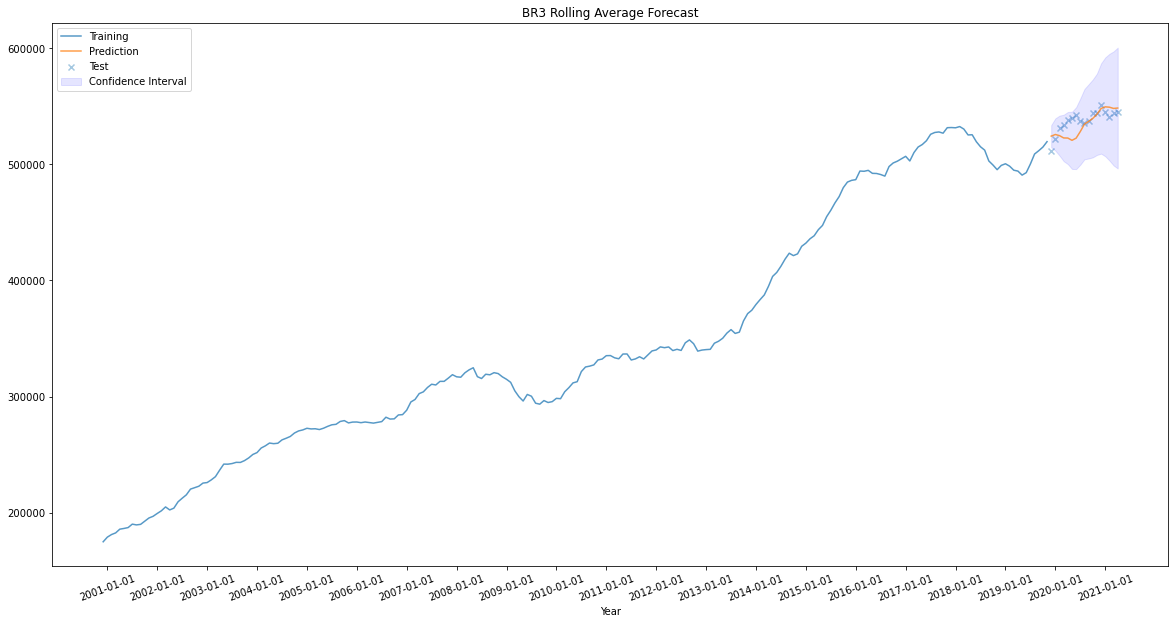

In [101]:
# Plot the points and the forecasts
import matplotlib.dates as mdates



plt.figure(figsize=(20,10))
plt.plot(br3ave_train, alpha=0.75, label="Training")
plt.plot(preds, alpha=0.75, label='Prediction')  # Forecasts
plt.scatter(br3ave_test.index, br3ave_test,
            alpha=0.4, marker='x', label='Test')  # Test data
plt.fill_between(br3ave_test.index, conf_int['high'], conf_int['low'], alpha=0.1, color='b', label='Confidence Interval')
plt.legend(loc='upper left')
plt.xticks(br3_ave.index[12::12], rotation=20 )
plt.title("BR3 Rolling Average Forecast")
plt.xlabel("Year")

In [102]:
model.update(br3ave_test)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(4, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [103]:
new_prediction, new_conf = model.predict(n_periods = 60, return_conf_int=True)

In [139]:
rng = pd.date_range('2021-06-01', periods=60, freq='MS')

In [136]:
br3_ave.index = pd.to_datetime(br3_ave.index, format = '%Y/%m/%d')

In [137]:
br3_ave.index[12::12]

DatetimeIndex(['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', name='ds', freq=None)

In [110]:
br3_ave.index.append(rng)

Index([       '2000-01-01',        '2000-02-01',        '2000-03-01',
              '2000-04-01',        '2000-05-01',        '2000-06-01',
              '2000-07-01',        '2000-08-01',        '2000-09-01',
              '2000-10-01',
       ...
       2025-08-01 00:00:00, 2025-09-01 00:00:00, 2025-10-01 00:00:00,
       2025-11-01 00:00:00, 2025-12-01 00:00:00, 2026-01-01 00:00:00,
       2026-02-01 00:00:00, 2026-03-01 00:00:00, 2026-04-01 00:00:00,
       2026-05-01 00:00:00],
      dtype='object', length=317)

In [134]:
new_preds = pd.DataFrame(new_prediction, columns = ['preds'], index=rng.dt.strftime('%Y-%m-%d'))
new_conf_int = pd.DataFrame(new_conf, columns = ['low', 'high'], index=rng.dt.strftime('%Y-%m-%d'))

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

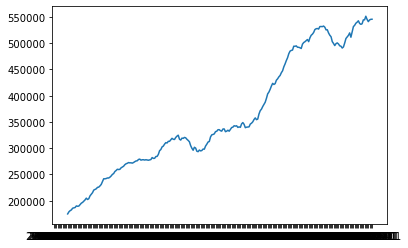

In [132]:
new_conf_int

,low,high
2021-06-01 00:00:00,537367.858875,556442.542520
2021-07-01 00:00:00,535200.353773,562999.902123
2021-08-01 00:00:00,529310.862224,563728.695498
2021-09-01 00:00:00,526058.520242,566015.103468
2021-10-01 00:00:00,524821.444619,569637.513286
2021-11-01 00:00:00,527973.103112,577170.990158
2021-12-01 00:00:00,526559.506684,579779.653045
2022-01-01 00:00:00,530508.251848,587466.742876
2022-02-01 00:00:00,525607.457217,586073.601869
2022-03-01 00:00:00,521785.053604,585566.238923


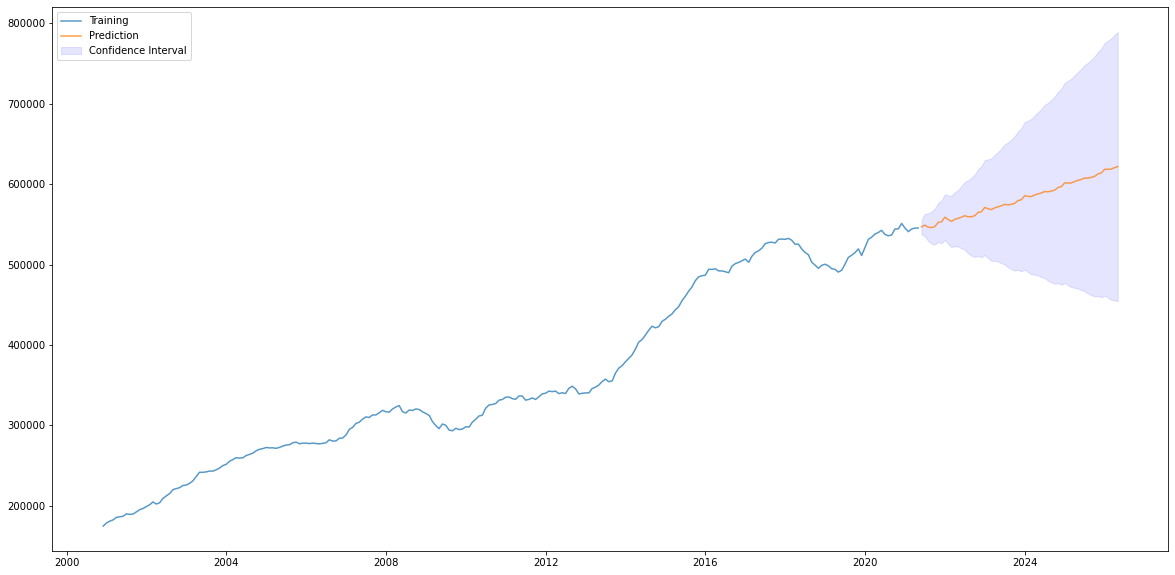

In [147]:
plt.figure(figsize=(20,10))
plt.plot(br3_ave, alpha=0.75, label="Training")
plt.plot(new_preds, alpha=0.75, label='Prediction')  # Forecasts
#plt.scatter(br3ave_test.index, br3ave_test,
            #alpha=0.4, marker='x', label='Test')  # Test data
plt.fill_between(new_preds.index, new_conf_int['high'], new_conf_int['low'], alpha=0.1, color='b', label='Confidence Interval')
plt.legend(loc='upper left')
#plt.xticks(br3_ave.index[12::12], rotation=20 )
# plt.title("BR3 Rolling Average Forecast")
# plt.xlabel("Year")

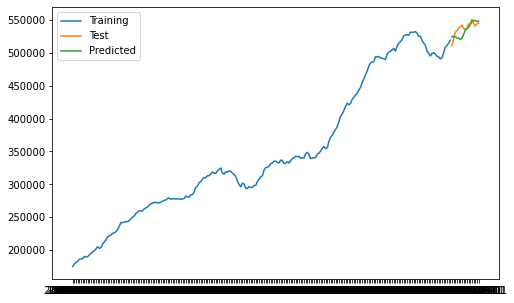

In [31]:
plt.figure(figsize=(8,5))
plt.plot(br3ave_train,label="Training")
plt.plot(br3ave_test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
#plt.savefig('SecondPrection.jpg')
plt.show()

In [32]:
smape(br3ave_test['y'], prediction['predicted_price'])

1.427168629768669

This approach is reasonably fast and compares well against other more labour intensive methods. For a project that requires the evaluation of so many zip codes, it seems sensible to use pmdarima.

In [15]:
list_of_zips = list(df1['zip'].unique())
summary_auto = pd.DataFrame({'Zip': [], 'SMAPE':[]})


summary_auto

,Zip,SMAPE


In [16]:
for x,i in enumerate(list_of_zips):
    df = df1[df1['zip']==i].copy()
    if len(df) < 257:
        continue
    #print(df.head())
    df.drop('zip', axis=1, inplace=True)
    #print(df.head())
    df.columns = ['ds', 'y']
    df.set_index('ds', inplace=True)
    df = df.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)
    print(i)
    print(df.head())
    train = df[df.index < '2019-12-01']
    test = df[(df.index >= '2019-12-01') & (df.index < '2021-05-01')]
    model=auto_arima(train,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
    prediction = pd.DataFrame(model.predict(n_periods = len(test)),index=test.index)
    prediction.columns = ['predicted_price']
    test['predicted_price'] = prediction
    smape_auto = smape(test['y'], test['predicted_price'])
    summary_auto.loc[x] = [i, smape_auto]
    print('simple arima mean percent error: ', smape_auto)
    model.save('{}.pkl'.format(i))
    # load model
    #loaded = ARIMAResults.load('model.pkl'
#     plt.figure(figsize=(20,10))
#     plt.plot(train,label="Training")
#     plt.plot(test,label="Test")
#     plt.plot(prediction,label="Predicted")
#     plt.legend(loc = 'upper left')
#     plt.savefig('{}.png'.format(i), bbox_inches = 'tight')
#     plt.close()
    
# br3 = df1[df1['zip']=='BR3'].copy()
# br3.drop('zip', axis=1, inplace=True)
# br3.columns = ['ds', 'y']
# br3.set_index('ds', inplace=True)
# br3 = br3.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)
# br3_train = br3[br3.index < '2019-12-01']
# br3_test = br3[(br3.index >= '2019-12-01') & (br3.index < '2021-05-01')]
# br3_val = br3[(br3.index >= '2019-01-01') & (br3.index < '2021-05-01')]
# model=auto_arima(br3_train,start_p=0,d=1,start_q=0,
#           max_p=5,max_d=5,max_q=5, start_P=0,
#           D=1, start_Q=0, max_P=5,max_D=5,
#           max_Q=5, m=12, seasonal=True,
#           error_action='warn',trace=True,
#           supress_warnings=True,stepwise=True,
#           random_state=20,n_fits=50)
# prediction = pd.DataFrame(model.predict(n_periods = len(br3_test)),index=br3_test.index)
# prediction.columns = ['predicted_price']
# prediction
# br3_test['predicted_price'] = prediction
# smape(br3_test['y'], br3_test['predicted_price'])

BR1
                        y
ds                       
2000-01-01  188510.882353
2000-02-01  166975.060606
2000-03-01  166774.318182
2000-04-01  184542.528090
2000-05-01  164167.565789
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5714.242, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5590.865, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5521.331, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5599.571, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5522.202, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5522.226, Time=1.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5543.629, Time=0.19 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5524.198, Time=1.58 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5594.039, Time=0.19 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5522.628, Time=0.61 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=5513.529, Time=0.55 sec
 ARIMA(0,1,2)(0,1,0)[12]          

<ipython-input-16-50a3fe530719>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_price'] = prediction


AttributeError: 'ARIMA' object has no attribute 'save'

## Facebook Prophet Modeling

In [ ]:
# train test split - validation data set separately. 

I will test the modelling phase on one postcode

<AxesSubplot:>

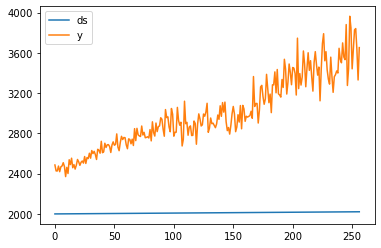

In [109]:
br1 = df1[df1['zip']=='BR1'].copy()
br1.drop('zip', axis=1, inplace=True)
br1.columns = ['ds', 'y']
#br1.set_index('ds', inplace=True)
br1.head()
br1.plot()

In [110]:
br1.tail()

,ds,y
252,2021-01-01,678702.567568
253,2021-02-01,683534.651163
254,2021-03-01,606612.500000
255,2021-04-01,496954.545455
256,2021-05-01,614408.333333


In [68]:
br1.describe()

,price_paid
count,2.640000e+02
mean,4.475413e+05
std,7.007040e+05
min,1.463465e+05
25%,2.820000e+05
50%,3.519109e+05
75%,4.836741e+05
max,1.063078e+07


In [88]:
from fbprophet import Prophet as proph

In [96]:
br1.head()

,ds,y
0,2000-01-01,188510.882353
1,2000-02-01,166975.060606
2,2000-03-01,166774.318182
3,2000-04-01,184542.528090
4,2000-05-01,164167.565789


In [100]:
br1.tail()

,ds,y
259,2021-08-01,656187.500000
260,2021-09-01,598966.666667
261,2021-10-01,584625.000000
262,2021-11-01,688750.000000
263,2021-12-01,438041.666667


In [111]:
Model = proph(interval_width=0.95)

In [112]:
# Fit the timeseries to Model
Model.fit(br1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [113]:
future_dates = Model.make_future_dataframe(periods=48, freq='MS')
future_dates.tail()

,ds
300,2025-01-01
301,2025-02-01
302,2025-03-01
303,2025-04-01
304,2025-05-01


In [114]:
# Predict the values for future dates and take the head of forecast
forecast = Model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,176987.249841,91940.078116,252461.218218,176987.249841,176987.249841,-6076.324614,-6076.324614,-6076.324614,-6076.324614,-6076.324614,-6076.324614,0.0,0.0,0.0,170910.925227
1,2000-02-01,178553.974410,103136.807894,264746.439605,178553.974410,178553.974410,4657.863359,4657.863359,4657.863359,4657.863359,4657.863359,4657.863359,0.0,0.0,0.0,183211.837769
2,2000-03-01,180019.619974,120897.831395,275123.941302,180019.619974,180019.619974,17766.019234,17766.019234,17766.019234,17766.019234,17766.019234,17766.019234,0.0,0.0,0.0,197785.639208
3,2000-04-01,181586.344542,83538.342106,241181.541169,181586.344542,181586.344542,-17964.502727,-17964.502727,-17964.502727,-17964.502727,-17964.502727,-17964.502727,0.0,0.0,0.0,163621.841816
4,2000-05-01,183102.529608,88045.396250,239923.142100,183102.529608,183102.529608,-18479.197364,-18479.197364,-18479.197364,-18479.197364,-18479.197364,-18479.197364,0.0,0.0,0.0,164623.332245


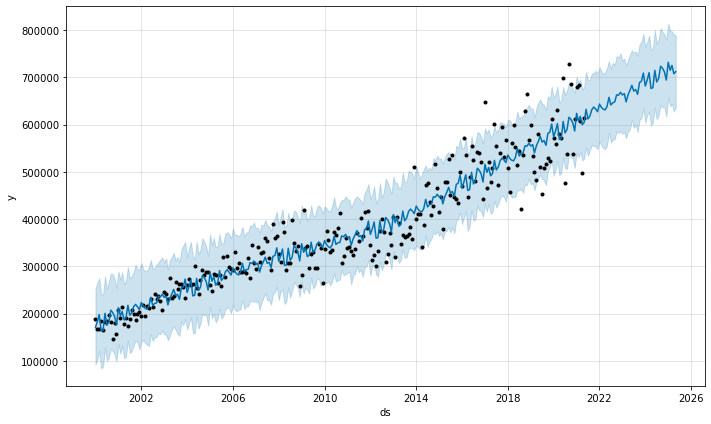

In [115]:
Model.plot(forecast, uncertainty=True)
plt.show()

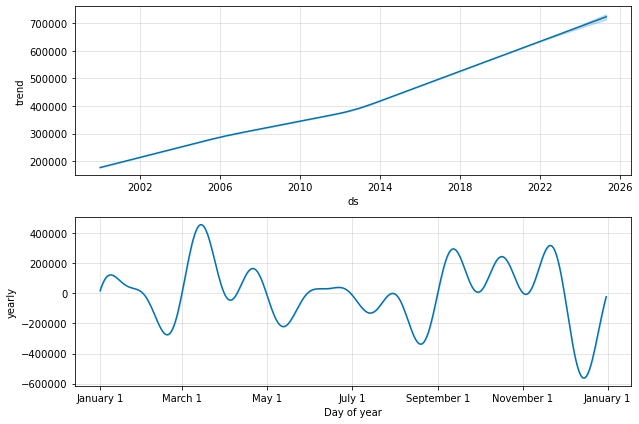

In [116]:
# Plot model components 
Model.plot_components(forecast)
plt.show()

In [118]:
import itertools
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
import statsmodels.api as sm
#Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(co2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [124]:
br1_sar = br1.set_index('ds')
br1_sar = br1_sar['y']

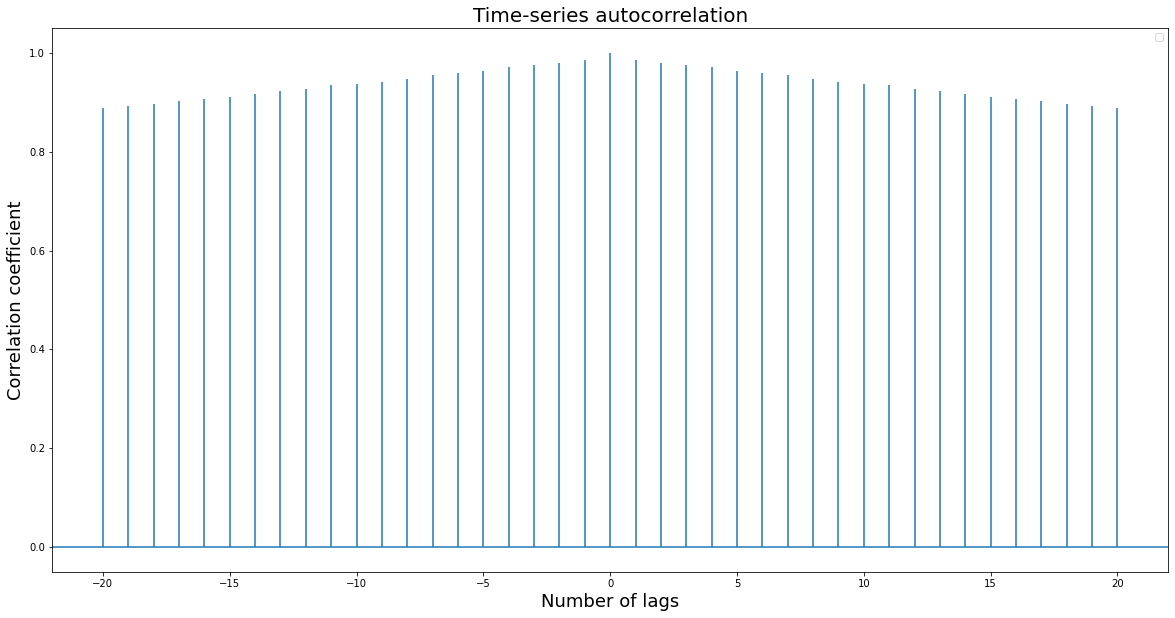

In [129]:
plt.figure(figsize=(20,10))
plt.acorr(x=br1_sar.values,maxlags=20)
plt.xlabel("Number of lags", fontsize='18')
plt.ylabel("Correlation coefficient", fontsize='18')
plt.title("Time-series autocorrelation", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [126]:
br1_sar.values

array([188510.88235294, 166975.06060606, 166774.31818182, 184542.52808989,
       164167.56578947, 181809.62121212, 184954.59756098, 196793.84615385,
       183029.31372549, 146346.54237288, 179883.43283582, 157578.48148148,
       207478.52830189, 189995.45454545, 213111.75789474, 178452.84313725,
       189863.83333333, 173522.67045455, 187611.4025974 , 208478.40659341,
       199864.09090909, 187232.27848101, 198268.17647059, 202974.89361702,
       195444.11764706, 219150.        , 194113.74358974, 215636.54639175,
       211584.11290323, 231111.35869565, 213169.40659341, 240920.64655172,
       229915.05376344, 237977.1375    , 226433.92553191, 208491.2804878 ,
       245587.36111111, 241985.19607843, 231179.63768116, 274469.86567164,
       233014.48717949, 236218.46875   , 267410.29411765, 252035.54455446,
       261870.51724138, 262326.06410256, 255531.88888889, 233893.31578947,
       260990.66176471, 272423.8       , 260159.02597403, 263272.42307692,
       301249.80769231, 2

In [123]:
br1_sar

,y
ds,
2000-01-01,188510.882353
2000-02-01,166975.060606
2000-03-01,166774.318182
2000-04-01,184542.528090
2000-05-01,164167.565789
...,...
2021-01-01,678702.567568
2021-02-01,683534.651163
2021-03-01,606612.500000


<AxesSubplot:xlabel='ds'>

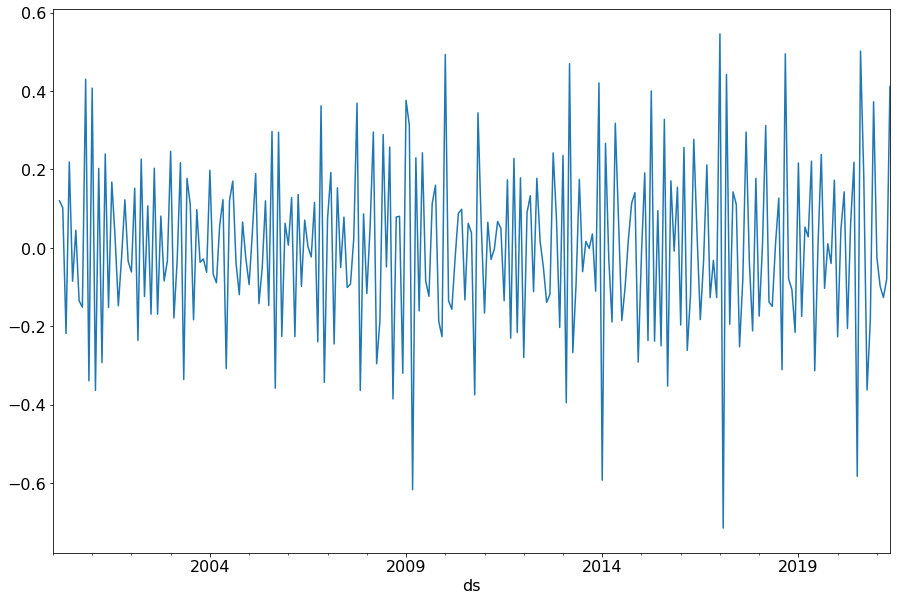

In [191]:
diff = np.log(br1_sar).diff().diff()
diff.plot()

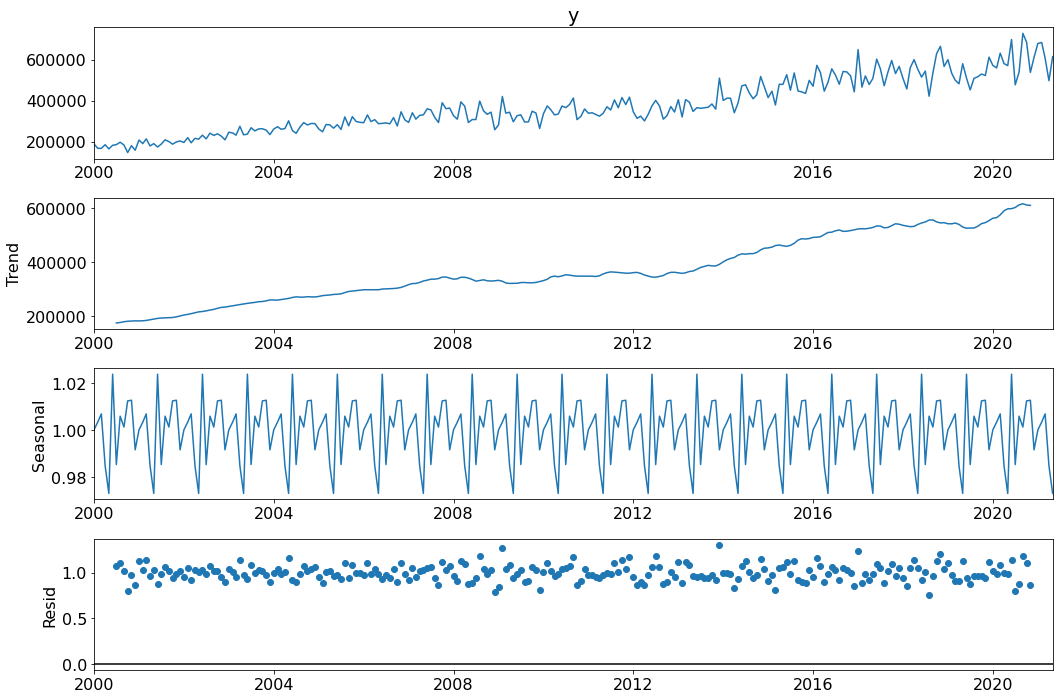

In [205]:
# seasonal orders and seaonal differencing, take only seasonal data from decomp.seasonal
# revert to study group,

results = seasonal_decompose(br1_sar,two_sided = True, model='multiplicative')
results.plot()
plt.show()

In [206]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [207]:
#train-test split
train_df = br1_sar[br1_sar.index < '2017-12-01']
test_df = br1_sar[(br1_sar.index >= '2017-12-01') & (br1_sar.index < '2019-01-01')]
val_df = br1_sar[(br1_sar.index >= '2019-01-01') & (br1_sar.index < '2021-05-01')]

In [208]:
cbrt_train =  np.cbrt(train_df)


In [209]:
from statsmodels.tsa.stattools import adfuller

(0.6437096171689164,
 0.98864488145156,
 10,
 204,
 {'1%': -3.462818103072159,
  '5%': -2.8758145932936805,
  '10%': -2.574378674548251},
 4754.043742286747)

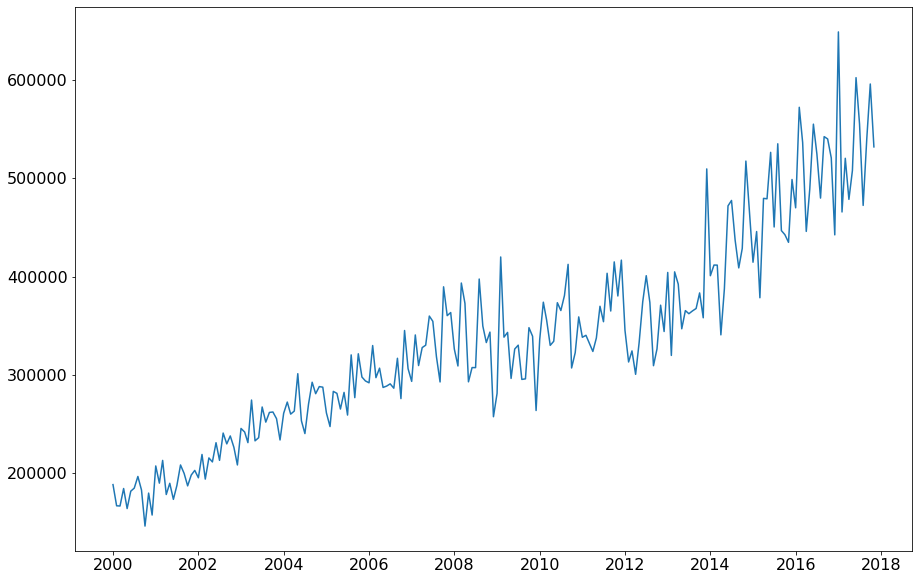

In [210]:
plt.plot(train_df)
adfuller(train_df)

(-12.261002900397507,
 1.4912302057185956e-19,
 4,
 209,
 {'1%': -4.0027517721652925,
  '5%': -3.4317085320958416,
  '10%': -3.139513599307244},
 4760.025183984892)

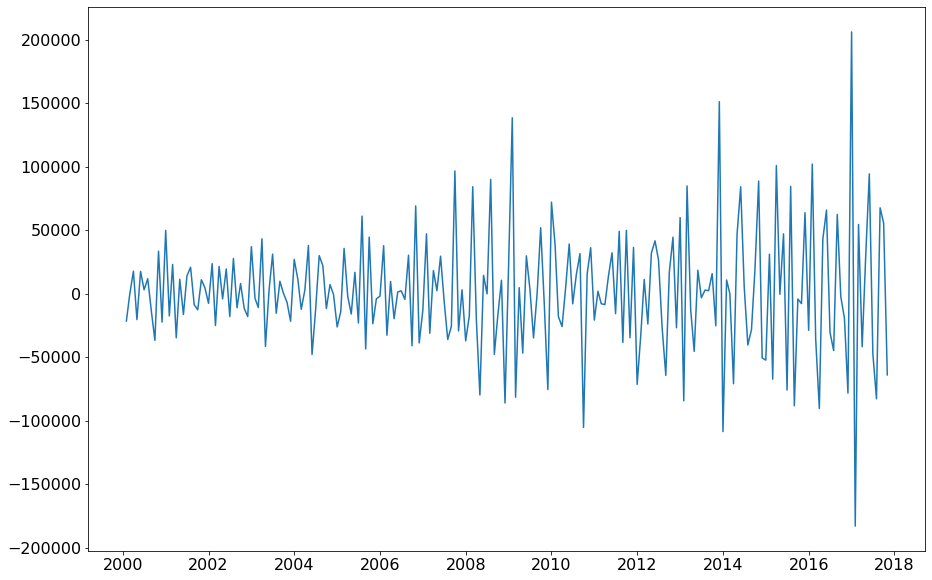

In [211]:
train_diff = train_df.diff(1).dropna()
plt.plot(train_diff)
adresults = adfuller(train_diff, autolag = 'BIC', regression = 'ct')
adresults

(-12.148642213455489,
 2.2273355629539834e-19,
 4,
 209,
 {'1%': -4.0027517721652925,
  '5%': -3.4317085320958416,
  '10%': -3.139513599307244},
 927.3803772056856)

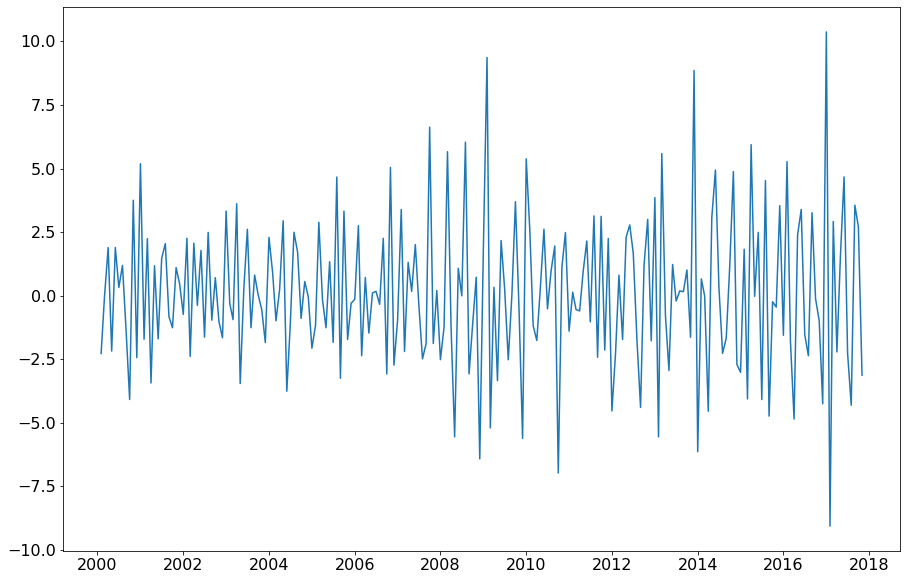

In [212]:
train_diff_cbrt = np.cbrt(train_df).diff(1).dropna()
plt.plot(train_diff_cbrt)
adresults = adfuller(train_diff_cbrt, autolag = 'BIC', regression = 'ct')
adresults

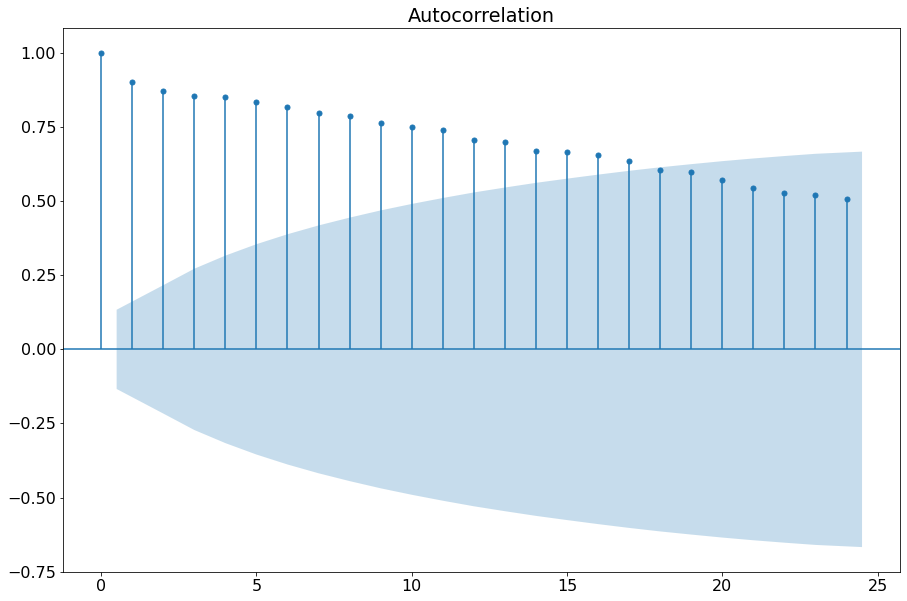

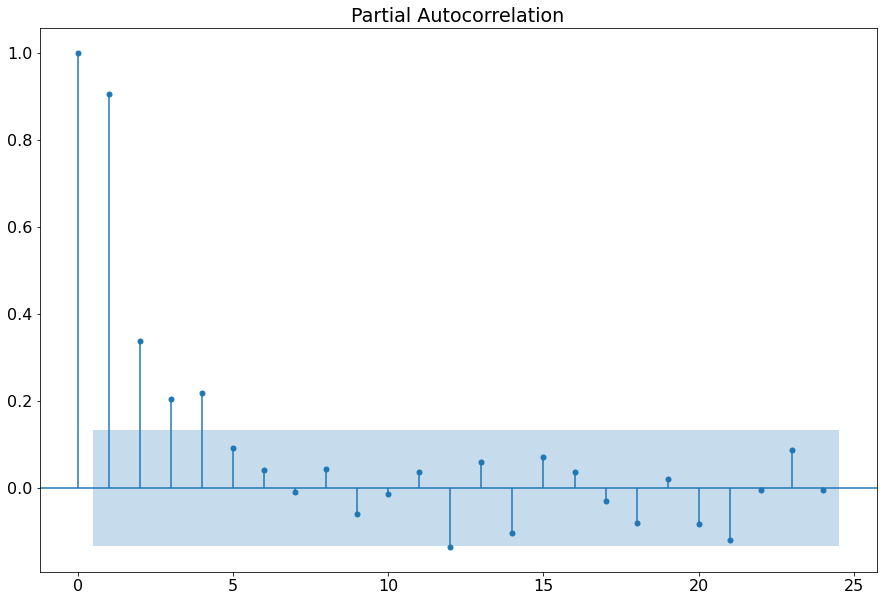

In [213]:
plot_acf(cbrt_train)
plot_pacf(cbrt_train)
plt.show()

In [217]:
def mean_percent_error(y_test, y_hat):
    from math import e
    error = np.abs(y_test - y_hat)
    percent_error = error/(y_test + e)
    mean_percent_error = percent_error.sum() / len(y_test)
    return mean_percent_error

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



simple arima mean percent error:  2021-06-01 00:00:00    0.0
2021-07-01 00:00:00    0.0
2021-08-01 00:00:00    0.0
2021-09-01 00:00:00    0.0
2021-10-01 00:00:00    0.0
2021-11-01 00:00:00    0.0
2021-12-01 00:00:00    0.0
2022-01-01 00:00:00    0.0
2022-02-01 00:00:00    0.0
2022-03-01 00:00:00    0.0
2022-04-01 00:00:00    0.0
2022-05-01 00:00:00    0.0
2022-06-01 00:00:00    0.0
y                      0.0
dtype: float64


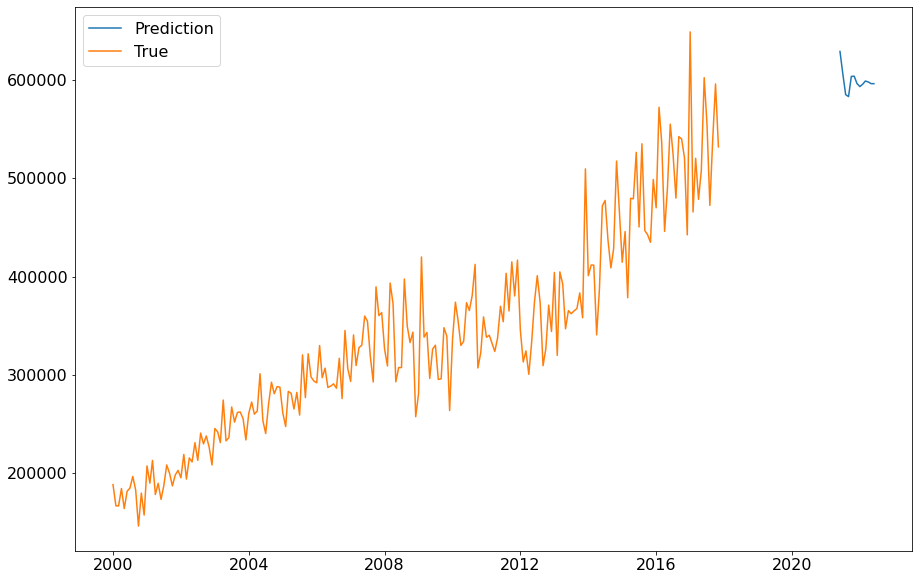

In [302]:
arimamodel = SARIMAX(cbrt_train, order = (4,1,0))
fit_model = arimamodel.fit()
yhat = fit_model.forecast(len(test_df))
# undo the cube root in order to compare to the test data
yhat = yhat**3
mpe = mean_percent_error(test_df,yhat)
print('simple arima mean percent error: ', mpe)
plt.plot(yhat, label = 'Prediction')
plt.plot(train_df, label = 'True')
plt.legend()
plt.show()

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


simple arima mean percent error:  0.12926302352498478


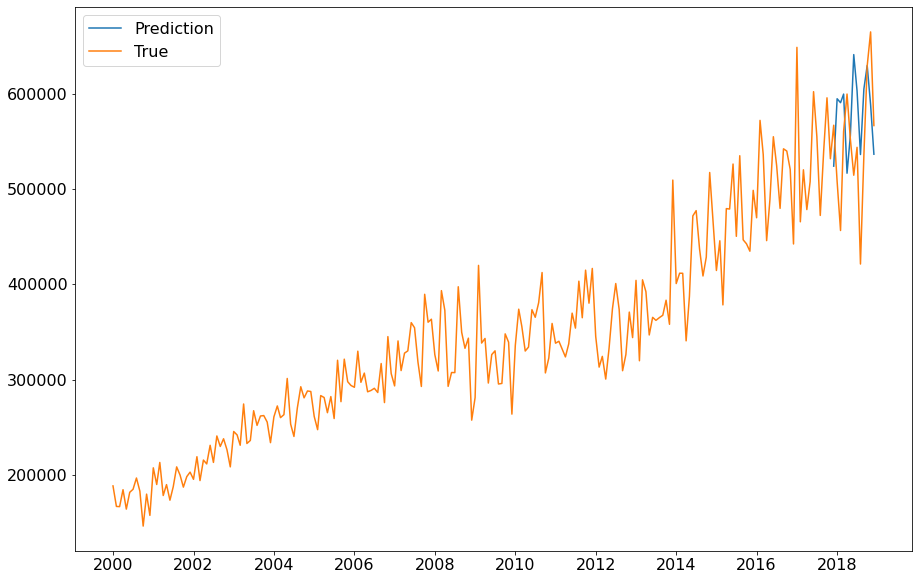

In [237]:

arimamodel = SARIMAX(cbrt_train, order = (4,1,0), seasonal_order = (1,1,0,12))
fit_model = arimamodel.fit()
yhat = fit_model.forecast(len(test_df))
# undo the cube root in order to compare to the test data
yhat = yhat**3
mpe = mean_percent_error(test_df,yhat)
print('simple arima mean percent error: ', mpe)
plt.plot(yhat, label = 'Prediction')
plt.plot(br1_sar[br1_sar.index < '2019-01-01'], label = 'True')
plt.legend()
plt.show()

In [229]:
test_results = pd.DataFrame(columns = ['MPE'])
for p in range(0,4):
    for d in range(1,3):
        for q in range(0,4):
            for P in range(0,4):
                for D in range(1,3):
                    for Q in range(0,4):
                        model = SARIMAX(cbrt_train, order =(p,d,q), seasonal_order = (P,D,Q,12))
                        fit_model = model.fit(maxiter = 200, disp = False)
                        yhat = fit_model.forecast(len(test_df))
                        yhat = yhat**3
                        ind = f'order = ({p},{d},{q}), seasonal_order = ({P},{D},{Q},12)'
                        mpe = mean_percent_error(test_df,yhat)
                        print(f'trying {ind}, MPE = {mpe}')
                        test_results.loc[ind,'MPE'] = mpe

test_results.min()

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (0,1,0,12), MPE = 0.12753356173833683
trying order = (0,1,0), seasonal_order = (0,1,1,12), MPE = 0.09744471956951317


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (0,1,2,12), MPE = 0.09493109348103618


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (0,1,3,12), MPE = 0.09512516270032319
trying order = (0,1,0), seasonal_order = (0,2,0,12), MPE = 0.2579896772490006


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-pa

trying order = (0,1,0), seasonal_order = (0,2,1,12), MPE = 0.12764995389272005


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (0,2,2,12), MPE = 0.11988546659318627


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (0,2,3,12), MPE = 0.1173633646755604


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,1,0,12), MPE = 0.1314412429007314


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,1,1,12), MPE = 0.0959220420445758


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,1,2,12), MPE = 0.09514399353107451


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,1,3,12), MPE = 0.09781665731951347


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,2,0,12), MPE = 0.21335075564879505


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,2,1,12), MPE = 0.13549406109771142


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,2,2,12), MPE = 0.1175497056112197


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (1,2,3,12), MPE = 0.12756265675440007
trying order = (0,1,0), seasonal_order = (2,1,0,12), MPE = 0.11323188857230518

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (2,1,1,12), MPE = 0.09541441028743576


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (2,1,2,12), MPE = 0.0983780090684229


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (2,1,3,12), MPE = 0.09745935064085437


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (2,2,0,12), MPE = 0.15268042007737515


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (2,2,1,12), MPE = 0.11442223781532596


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (2,2,2,12), MPE = 0.12099287723231698


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (2,2,3,12), MPE = 0.1261838255181418


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,1,0,12), MPE = 0.11311555392601183


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,1,1,12), MPE = 0.0948375804653376


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,1,2,12), MPE = 0.0978242608594746


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,1,3,12), MPE = 0.09805956137595286


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,2,0,12), MPE = 0.1499066647248966


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,2,1,12), MPE = 0.11357507412432821


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,2,2,12), MPE = 0.12221106293286349


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,0), seasonal_order = (3,2,3,12), MPE = 0.1257961319924841
trying order = (0,1,1), seasonal_order = (0,1,0,12), MPE = 0.12694632844975767


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (0,1,1,12), MPE = 0.10038875663110357


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (0,1,2,12), MPE = 0.10154177988761284


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (0,1,3,12), MPE = 0.10056947793467713


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (0,2,0,12), MPE = 0.19766710390055595


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (0,2,1,12), MPE = 0.12828102203945219


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (0,2,2,12), MPE = 0.11505972441802913


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (0,2,3,12), MPE = 0.11044505653507455


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,1,0,12), MPE = 0.1247364792552715


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,1,1,12), MPE = 0.10150656883144141


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,1,2,12), MPE = 0.09768743421977856


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,1,3,12), MPE = 0.10180977062908697


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,2,0,12), MPE = 0.17725145211476845


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,2,1,12), MPE = 0.12498699620731359


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,2,2,12), MPE = 0.10986264717083814


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (1,2,3,12), MPE = 0.11663936043148186


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,1,0,12), MPE = 0.11782021550687759


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,1,1,12), MPE = 0.10070014453974994


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,1,2,12), MPE = 0.10150071934689017


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,1,3,12), MPE = 0.10947232929871557


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,2,0,12), MPE = 0.14589274086536674


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,2,1,12), MPE = 0.11694343973966431


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,2,2,12), MPE = 0.10987729890704866


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (2,2,3,12), MPE = 0.11060618372766655


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,1,0,12), MPE = 0.1224885643303406


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,1,1,12), MPE = 0.1014383228605147


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,1,2,12), MPE = 0.10144533089115125


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,1,3,12), MPE = 0.10133742481447501


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,2,0,12), MPE = 0.15193774748739594


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,2,1,12), MPE = 0.11785219557858931


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,2,2,12), MPE = 0.10732440052294022


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,1), seasonal_order = (3,2,3,12), MPE = 0.11137079288948029


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,1,0,12), MPE = 0.12694994830635598


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,1,1,12), MPE = 0.10033675416451418


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,1,2,12), MPE = 0.10147098733752169


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,1,3,12), MPE = 0.10051600703537802


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,2,0,12), MPE = 0.19737703967146325


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,2,1,12), MPE = 0.1281886658300982


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,2,2,12), MPE = 0.11499670457733156


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (0,2,3,12), MPE = 0.11045070369339352


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,1,0,12), MPE = 0.12476110083015188


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,1,1,12), MPE = 0.1014285048650725


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,1,2,12), MPE = 0.09769471196230026


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,1,3,12), MPE = 0.10174034265754382


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,2,0,12), MPE = 0.1766957732076942


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,2,1,12), MPE = 0.12497451268409286


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,2,2,12), MPE = 0.10989105056258468


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (1,2,3,12), MPE = 0.1169249034664829


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (2,1,0,12), MPE = 0.11768867535333127


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (2,1,1,12), MPE = 0.10064276727734539


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (2,1,2,12), MPE = 0.10139841515717424


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (2,1,3,12), MPE = 0.10940211668009706


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (2,2,0,12), MPE = 0.14474660688051608


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (2,2,1,12), MPE = 0.1167520473469794
trying order = (0,1,2), seasonal_order = (2,2,2,12), MPE = 0.10989535518602607


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (2,2,3,12), MPE = 0.11060727847472943


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,1,0,12), MPE = 0.122804223587092


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,1,1,12), MPE = 0.1014095113449393


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,1,2,12), MPE = 0.10141466565687536


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,1,3,12), MPE = 0.10134553677399467


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,2,0,12), MPE = 0.15319465029315


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,2,1,12), MPE = 0.11796087658433335


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,2,2,12), MPE = 0.11276483792883973


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,2), seasonal_order = (3,2,3,12), MPE = 0.11137621377850661


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


trying order = (0,1,3), seasonal_order = (0,1,0,12), MPE = 0.12681202118430135


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (0,1,1,12), MPE = 0.0993602128734319


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (0,1,2,12), MPE = 0.10152644973060673


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (0,1,3,12), MPE = 0.10076971885859834


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (0,2,0,12), MPE = 0.19734276598821582


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (0,2,1,12), MPE = 0.1281668497721084


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (0,2,2,12), MPE = 0.11647139108712995


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (0,2,3,12), MPE = 0.10979513112554762


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,1,0,12), MPE = 0.12480676565096484


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,1,1,12), MPE = 0.10141875487054869


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,1,2,12), MPE = 0.09846057366410149


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,1,3,12), MPE = 0.10176934993139884


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,2,0,12), MPE = 0.1769870861165866


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,2,1,12), MPE = 0.12494186963467063


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,2,2,12), MPE = 0.11031133371400435


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (1,2,3,12), MPE = 0.11816798639150508


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,1,0,12), MPE = 0.11803196393256984


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,1,1,12), MPE = 0.10098427817382835


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,1,2,12), MPE = 0.10153194036857452


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,1,3,12), MPE = 0.09847227057653114


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,2,0,12), MPE = 0.14507357587911052


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,2,1,12), MPE = 0.11703590376338666


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,2,2,12), MPE = 0.10980501279424058


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (2,2,3,12), MPE = 0.11001444309115521


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,1,0,12), MPE = 0.12253295193258172


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,1,1,12), MPE = 0.10161418479658968


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,1,2,12), MPE = 0.10162860920829928


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,1,3,12), MPE = 0.11010613719132235


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,2,0,12), MPE = 0.15097624715742042


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,2,1,12), MPE = 0.11770442111117715


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,2,2,12), MPE = 0.10754717543972078


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,1,3), seasonal_order = (3,2,3,12), MPE = 0.11226656026905991


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,1,0,12), MPE = 0.45515605202715054


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,1,1,12), MPE = 0.6088407725121887


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,1,2,12), MPE = 0.6605143690968382


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,1,3,12), MPE = 0.6603567852548309


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,2,0,12), MPE = 0.5112563412441609


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,2,1,12), MPE = 0.42205902073684654


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,2,2,12), MPE = 0.6220762738505083


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (0,2,3,12), MPE = 0.6574609826846971


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (1,1,0,12), MPE = 0.42208548929684964


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (1,1,1,12), MPE = 0.6428051364443974


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (1,1,2,12), MPE = 0.658526330066776


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (1,1,3,12), MPE = 0.5932309667171466
trying order = (0,2,0), seasonal_order = (1,2,0,12), MPE = 0.8180168730332231


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (1,2,1,12), MPE = 0.3931648188862755


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (1,2,2,12), MPE = 0.6503706368210475


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (1,2,3,12), MPE = 0.535181342699875


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (2,1,0,12), MPE = 0.6933509620497499


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (2,1,1,12), MPE = 0.6667105207139147


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (2,1,2,12), MPE = 0.5694415256912851


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (2,1,3,12), MPE = 0.5742366807168545


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (2,2,0,12), MPE = 0.4473800011007269


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


trying order = (0,2,0), seasonal_order = (2,2,1,12), MPE = 0.6540643102967508


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


KeyboardInterrupt: 

In [238]:

test_results.sort_values(by = 'MPE').head(25)

,MPE
"order = (0,1,0), seasonal_order = (3,1,1,12)",0.0948376
"order = (0,1,0), seasonal_order = (0,1,2,12)",0.0949311
"order = (0,1,0), seasonal_order = (0,1,3,12)",0.0951252
"order = (0,1,0), seasonal_order = (1,1,2,12)",0.095144
"order = (0,1,0), seasonal_order = (2,1,1,12)",0.0954144
"order = (0,1,0), seasonal_order = (1,1,1,12)",0.095922
"order = (0,1,0), seasonal_order = (0,1,1,12)",0.0974447
"order = (0,1,0), seasonal_order = (2,1,3,12)",0.0974594
"order = (0,1,1), seasonal_order = (1,1,2,12)",0.0976874
"order = (0,1,2), seasonal_order = (1,1,2,12)",0.0976947


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



simple arima mean percent error:  2021-06-01 00:00:00    0.0
2021-07-01 00:00:00    0.0
2021-08-01 00:00:00    0.0
2021-09-01 00:00:00    0.0
2021-10-01 00:00:00    0.0
2021-11-01 00:00:00    0.0
2021-12-01 00:00:00    0.0
2022-01-01 00:00:00    0.0
2022-02-01 00:00:00    0.0
2022-03-01 00:00:00    0.0
2022-04-01 00:00:00    0.0
2022-05-01 00:00:00    0.0
2022-06-01 00:00:00    0.0
y                      0.0
dtype: float64


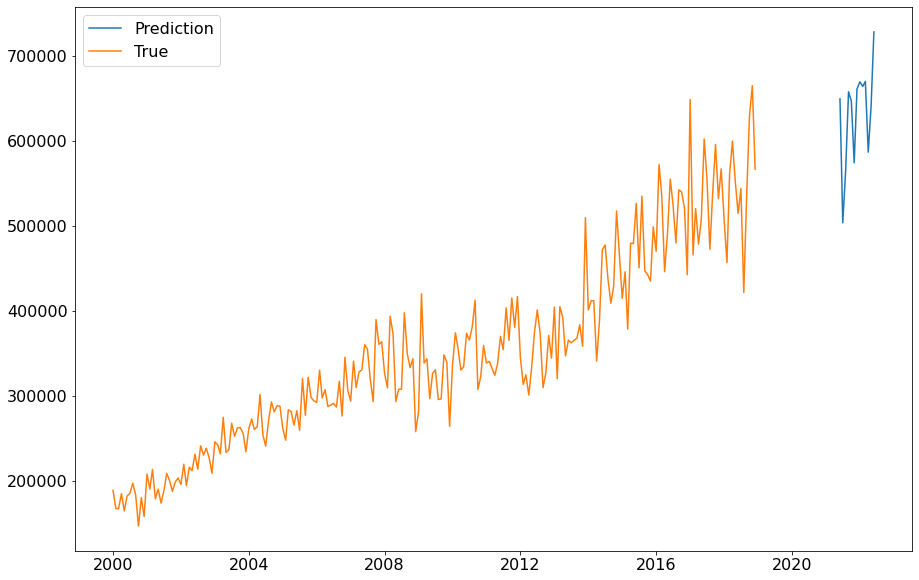

In [296]:

arimamodel = SARIMAX(cbrt_train, order = (4,1,2), seasonal_order = (1,1,0,12))
fit_model = arimamodel.fit()
yhat = fit_model.forecast(len(test_df))
# undo the cube root in order to compare to the test data
yhat = yhat**3
mpe = mean_percent_error(test_df,yhat)
print('simple arima mean percent error: ', mpe)
plt.plot(yhat, label = 'Prediction')
plt.plot(br1_sar[br1_sar.index < '2019-01-01'], label = 'True')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [365]:
test2

ds
2020-08-01    534973.666667
2020-09-01    446723.837838
2020-10-01    442565.607143
2020-11-01    434799.430380
2020-12-01    498660.986842
2021-01-01    469885.481928
2021-02-01    572063.557692
2021-03-01    536297.452632
2021-04-01    445893.706897
2021-05-01    488993.553846
2021-06-01    554922.000000
2021-07-01    524490.000000
2021-08-01    479752.132075
2021-09-01    542243.775510
2021-10-01    539870.227273
2021-11-01    520614.625000
2021-12-01    442381.818182
2022-01-01    648688.135593
2022-02-01    465637.254902
2022-03-01    520213.037975
2022-04-01    478475.609756
2022-05-01    507756.710526
2022-06-01    602193.582278
2022-07-01    555073.333333
2022-08-01    472330.709091
2022-09-01    540035.750000
2022-10-01    595735.196078
2022-11-01    531811.393443
2022-12-01    566981.132075
2023-01-01    507975.465116
2023-02-01    456520.370370
2023-03-01    560522.641509
2023-04-01    599696.428571
2023-05-01    552740.777778
2023-06-01    514515.340909
2023-07-01    543

In [364]:
br1_sar

ds
2000-01-01    188510.882353
2000-02-01    166975.060606
2000-03-01    166774.318182
2000-04-01    184542.528090
2000-05-01    164167.565789
2000-06-01    181809.621212
2000-07-01    184954.597561
2000-08-01    196793.846154
2000-09-01    183029.313725
2000-10-01    146346.542373
2000-11-01    179883.432836
2000-12-01    157578.481481
2001-01-01    207478.528302
2001-02-01    189995.454545
2001-03-01    213111.757895
2001-04-01    178452.843137
2001-05-01    189863.833333
2001-06-01    173522.670455
2001-07-01    187611.402597
2001-08-01    208478.406593
2001-09-01    199864.090909
2001-10-01    187232.278481
2001-11-01    198268.176471
2001-12-01    202974.893617
2002-01-01    195444.117647
2002-02-01    219150.000000
2002-03-01    194113.743590
2002-04-01    215636.546392
2002-05-01    211584.112903
2002-06-01    231111.358696
2002-07-01    213169.406593
2002-08-01    240920.646552
2002-09-01    229915.053763
2002-10-01    237977.137500
2002-11-01    226433.925532
2002-12-01    208

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



simple arima mean percent error:  0.23317983419824587


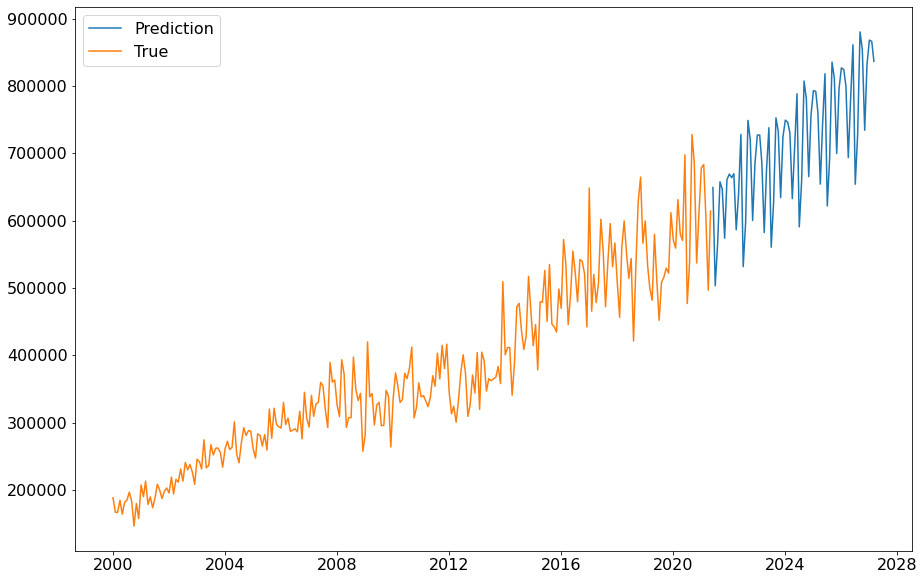

In [297]:

arimamodel = SARIMAX(cbrt_train2, order = (4,1,2), seasonal_order = (1,1,0,12))
fit_model = arimamodel.fit()
yhat = fit_model.forecast(len(test2))
# undo the cube root in order to compare to the test data
yhat = yhat**3
mpe = mean_percent_error(test2,yhat)
print('simple arima mean percent error: ', mpe)
plt.plot(yhat, label = 'Prediction')
plt.plot(br1_sar, label = 'True')
plt.legend()
plt.show()

In [ ]:
compare with rolling mean and add confidence intervals - don't worry about capturing the variance in forecast.
explore seasonality - is it across all zips?
general recommendation according to risk profile of individual
rolling STD
compare rolling mean prediction vs rolling mean of actual

Time to try the model on another series

In [280]:
br2 = df1[df1['zip']=='BR2'].copy()
br2.drop('zip', axis=1, inplace=True)
br2.columns = ['ds', 'y']
br2.set_index('ds', inplace=True)
br2 = br2.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)

cbrt_train3 = np.cbrt(br2)

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



simple arima mean percent error:  0.1155586383528


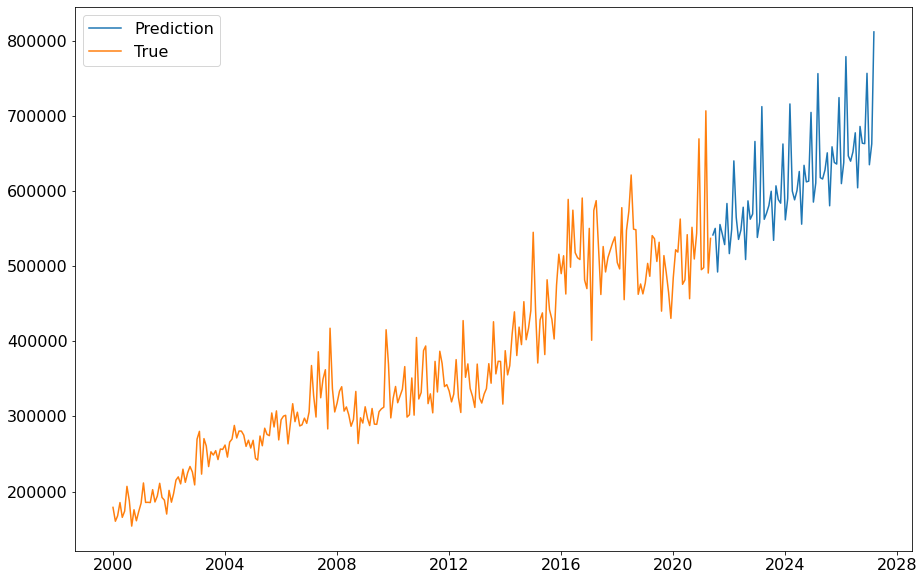

In [281]:
arimamodel = SARIMAX(cbrt_train3, order = (4,1,2), seasonal_order = (1,1,0,12))
fit_model = arimamodel.fit()
yhat = fit_model.forecast(len(test2))
# undo the cube root in order to compare to the test data
yhat = yhat**3
mpe = mean_percent_error(test2,yhat)
print('simple arima mean percent error: ', mpe)
plt.plot(yhat, label = 'Prediction')
plt.plot(br2, label = 'True')
plt.legend()
plt.show()

In [279]:
br2

,y
ds,
2000-01-01,178938.571429
2000-02-01,160475.600000
2000-03-01,167601.191011
2000-04-01,185332.692308
2000-05-01,165669.510870
...,...
2021-01-01,495161.735849
2021-02-01,497879.387755
2021-03-01,706492.508772


In [271]:
test2

ds
2020-08-01    534973.666667
2020-09-01    446723.837838
2020-10-01    442565.607143
2020-11-01    434799.430380
2020-12-01    498660.986842
                  ...      
2026-01-01    678702.567568
2026-02-01    683534.651163
2026-03-01    606612.500000
2026-04-01    496954.545455
2026-05-01    614408.333333
Name: y, Length: 70, dtype: float64

ds
2000-01-01    188510.882353
2000-02-01    166975.060606
2000-03-01    166774.318182
2000-04-01    184542.528090
2000-05-01    164167.565789
                  ...      
2021-01-01    678702.567568
2021-02-01    683534.651163
2021-03-01    606612.500000
2021-04-01    496954.545455
2021-05-01    614408.333333
Name: y, Length: 257, dtype: float64

In [270]:
test2

ds
2020-08-01    534973.666667
2020-09-01    446723.837838
2020-10-01    442565.607143
2020-11-01    434799.430380
2020-12-01    498660.986842
                  ...      
2026-01-01    678702.567568
2026-02-01    683534.651163
2026-03-01    606612.500000
2026-04-01    496954.545455
2026-05-01    614408.333333
Name: y, Length: 70, dtype: float64

In [ ]:
#Creating a test date set of future dates
br1_test_future=br1_sar_test
br1_test_future.index=br1_test_future.index+pd.DateOffset(years=5)
y_hat_avg_future = br1_test_future.copy()
fit_future = sm.tsa.statespace.SARIMAX(br1_sar, order=(0, 1, 1),seasonal_order=(1,1,1,12)).fit()
y_hat_avg_future['SARIMA'] = fit2.predict(start=br1_test_future.index[0],end=br1_test_future.index[-1])
plt.figure(figsize=(20,10))
plt.plot( br1_sar, label='Train')
plt.plot(y_hat_avg_future['SARIMA'], label='Predicted', color='g')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([br1_sar_train.index[0], br1_test_future.index[-1]]))
plt.ylabel("Mean Price (£)", fontsize='18')
plt.title("Future predictions with SARIMA model: my parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [269]:
import plotly.graph_objects as go
cbrt_train2 =  np.cbrt(train2)

model3 = SARIMAX(cbrt_train2, order = (4,1,2), seasonal_order = (1,1,0,12),
                                       freq = 'MS')
fit_model3 = model3.fit(maxiter = 200, disp = False)
yhat = fit_model3.forecast(len(test2))**3
mpe = mean_percent_error(train2,yhat)
print(f'mpe = {mpe}')

fig = go.Figure(layout_title_text = f'January Prediction from 2020 Data: Accuracy= {round((1-mpe)*100,2)}%',)
fig.add_trace(go.Scatter(x=train2.index,y=train2.values, name = 'Actual'))
fig.add_trace(go.Scatter(x=yhat.index,y=yhat.values, name = 'Predicted',
                         mode='lines'))
fig.update_layout(paper_bgcolor = 'LightSteelBlue')
fig.show()

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



mpe = 0.0


<ipython-input-131-05a703390047>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposistion=seasonal_decompose(br1_sar,freq=12)


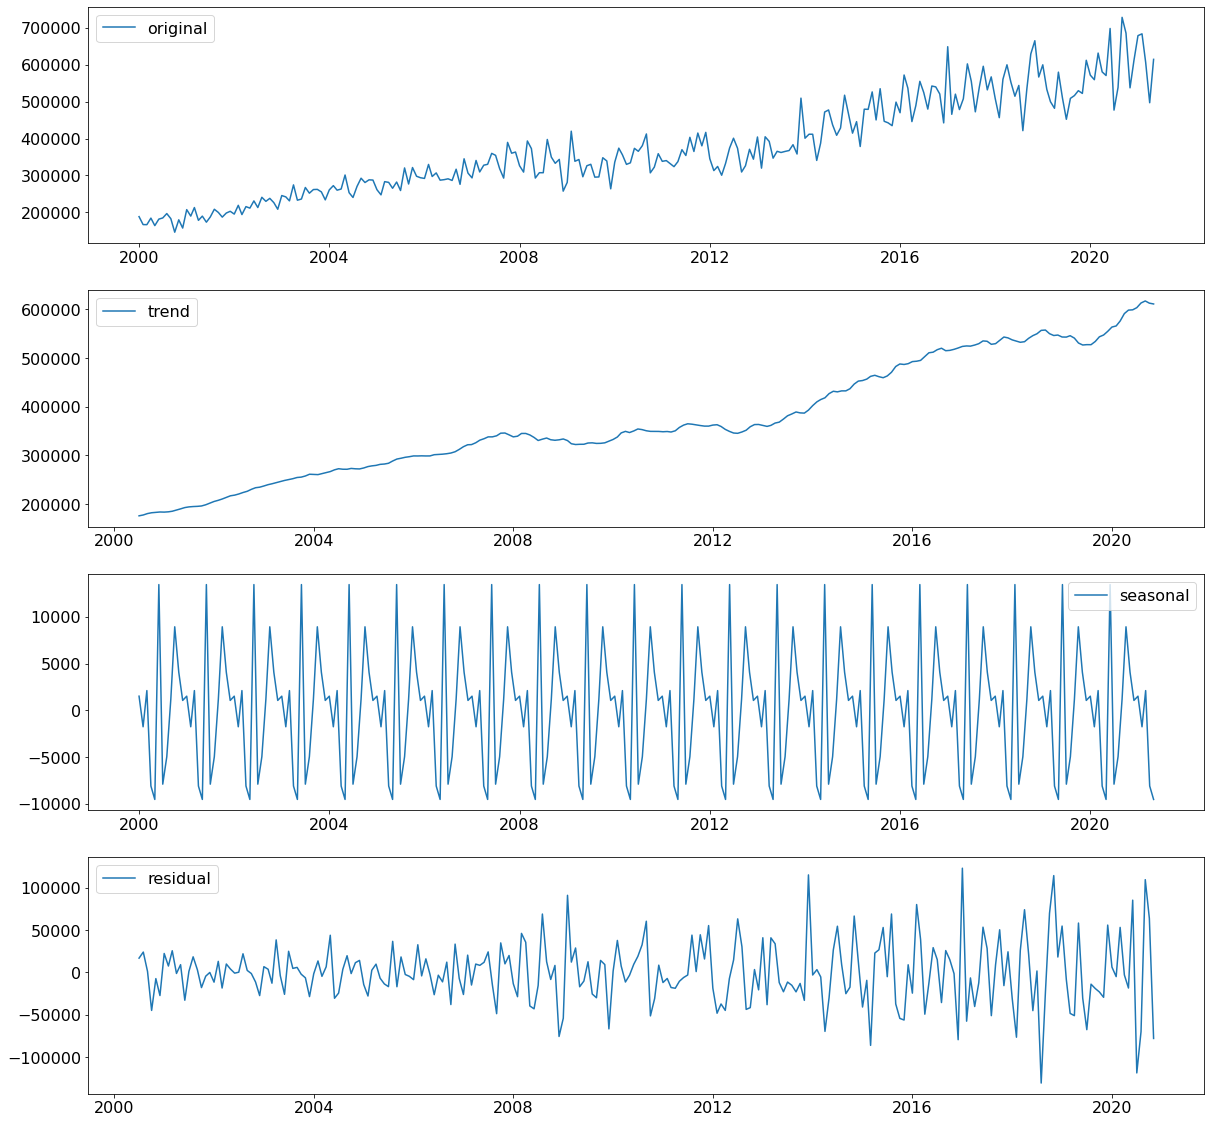

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(br1_sar,freq=12)

trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(br1_sar,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

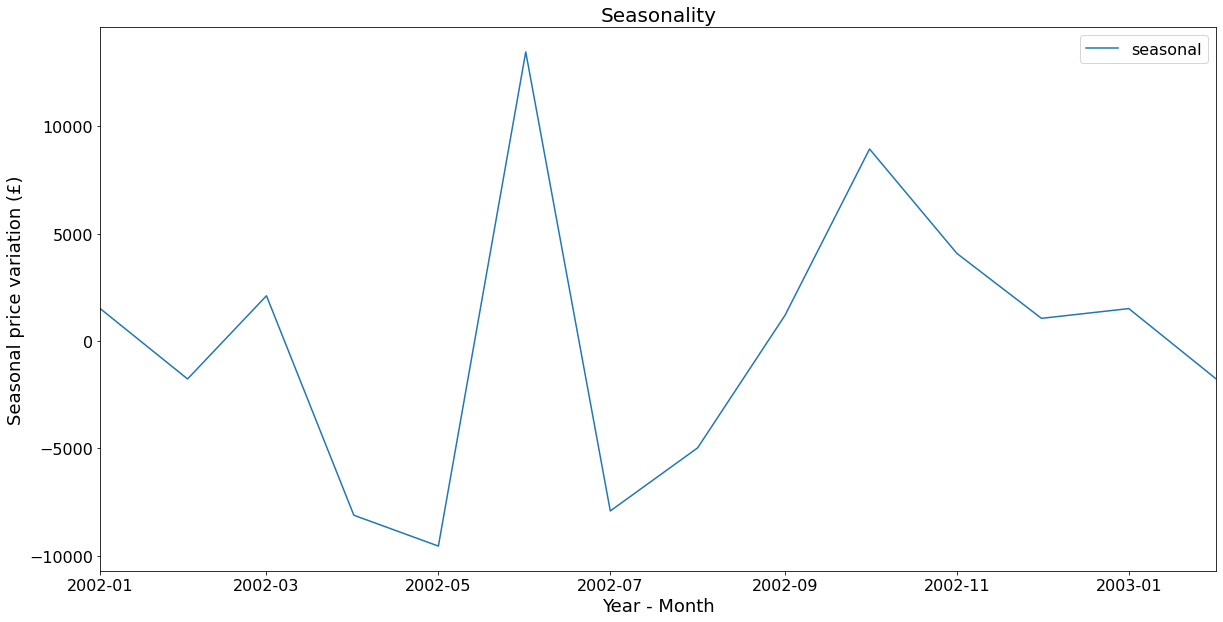

In [136]:
import datetime
import matplotlib.dates as dates
plt.figure(figsize=(20,10))
plt.plot(seasonal,label='seasonal')
plt.xlim(dates.date2num([seasonal.index[24], seasonal.index[37]]))
plt.xlabel("Year - Month", fontsize='18')
plt.ylabel("Seasonal price variation (£)", fontsize='18')
plt.title("Seasonality", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [138]:

# Using groupby to find the seasonal trend for each year
seasonal=seasonal.reset_index()
seasonal['Year']=seasonal['ds'].dt.year
seasonal_year=seasonal.groupby('Year')

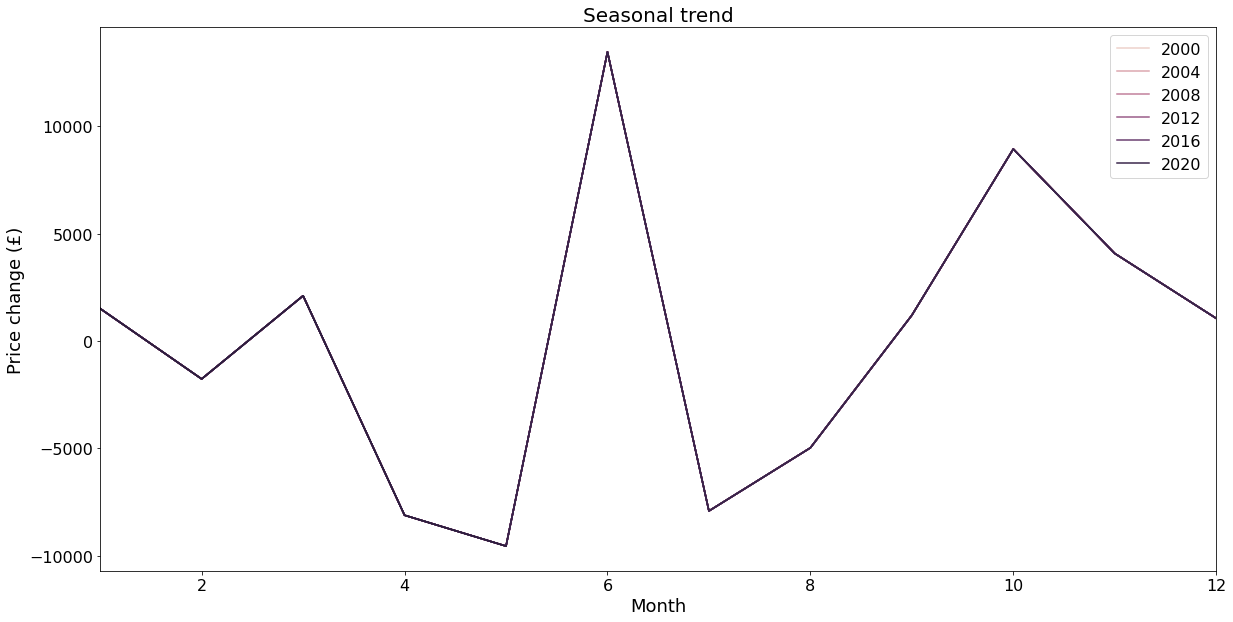

In [139]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.lineplot(x=(seasonal['ds'].dt.month),y=seasonal['seasonal'],hue='Year',data=seasonal);

plt.xlabel("Month", fontsize='18')
plt.ylabel("Price change (£)", fontsize='18')
plt.title("Seasonal trend", fontsize='20')
plt.xlim([1,12])
plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.legend(loc='best')
plt.show()


In [140]:
#Train-test split, 20 years of training data and 5 years of test data
br1_sar_train=br1_sar[br1_sar.index[0]:( br1_sar.index[br1_sar.index.get_loc('2016-01-01', method='nearest')])]
br1_sar_test=br1_sar[ br1_sar.index[br1_sar.index.get_loc('2015-7-30', method='nearest')]:br1_sar.index[-1]]

In [143]:
import statsmodels.api as sm
#Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(br1_sar_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-pa

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5421.753308445712
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4983.38709613577
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4407.518727099683


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4116.776675631918
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4413.296127568787


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4380.455771403944
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4135.350647208033


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4111.913354056642
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5264.934362332543
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =4911.093572309214

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4378.8514472105


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =4079.599004134291
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4939.488485635469


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4886.582938032643
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =4118.046884167634


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4071.4963269834734
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4602.715325177451


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4319.606870764719
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4464.207425737577


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4075.2173396153175
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4341.004359203211


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4320.095324236972


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4118.089889197043


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4057.4407000997476


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4501.672054921928


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4226.4387175480015


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4346.993839275476


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4002.575880192918
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4272.885145453183


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4228.135513455038
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4060.2624097094003


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =3999.242131365625
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4627.9270564211365
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4344.064162456043
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4400.520656846742

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-pa


ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4088.4343542971683

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4398.0314089467465

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4344.492948364939


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4078.9323484784786


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4077.313377843725


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =4519.074154948524


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =4243.467367979107


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4365.465889938343


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =4019.43930452769


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4266.636301521162


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4245.327680739872


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =4055.2271425711697


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4016.269039528889
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4567.053833676151
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4289.819688061327


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-pa

ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4418.503439258077


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4056.610119332575
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4289.535119456626


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4290.945797842622


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4070.402409951441


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4053.001529420724
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4503.040679736556


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4227.742444280957


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4348.985490653403


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4004.4850700506627


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4251.272800210784


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4229.412469063076
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4037.949661263194


C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4000.8337245877246


In [144]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]


pdq         (0, 1, 1)
pdqs    (1, 1, 1, 12)
aic           3999.24
Name: 31, dtype: object

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


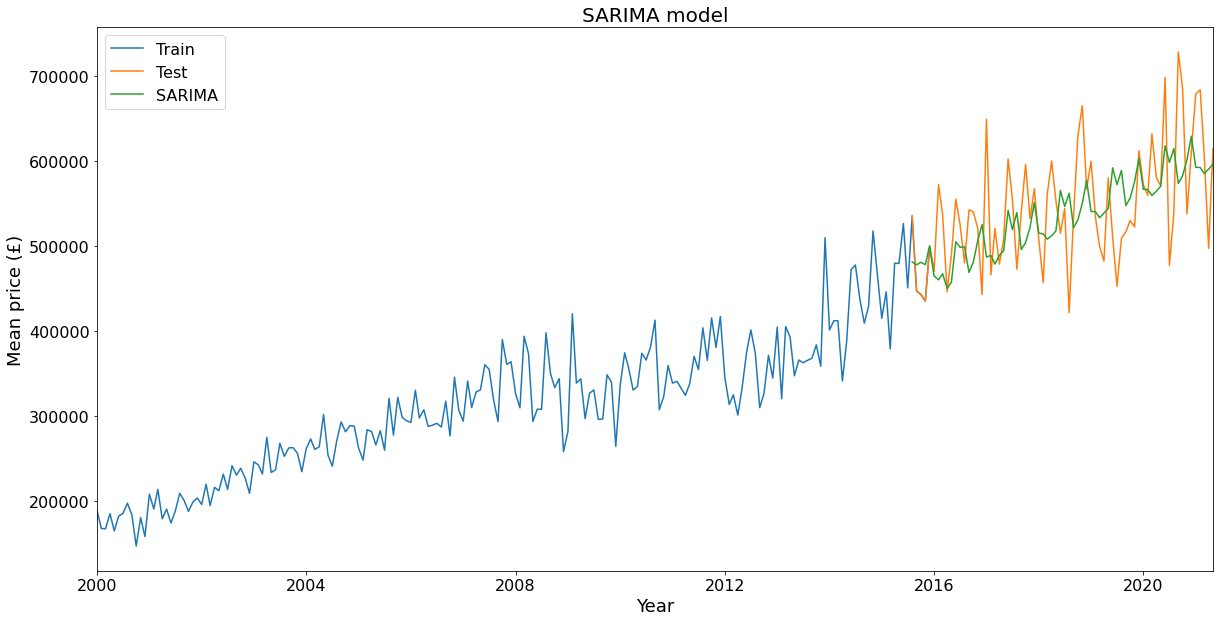

In [145]:

import statsmodels.api as sm
from datetime import datetime
#SARIMA
y_hat_avg = br1_sar_test.copy()
fit2 = sm.tsa.statespace.SARIMAX(br1_sar_train, order=(0, 1, 1),seasonal_order=(1,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit2.predict(start=br1_sar_test.index[0],end=br1_sar_test.index[-1])
plt.figure(figsize=(20,10))
plt.plot( br1_sar_train, label='Train')
plt.plot(br1_sar_test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([br1_sar_train.index[0], br1_sar_test.index[-1]]))
plt.ylabel("Mean price (£)", fontsize='18')
plt.title("SARIMA model", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [146]:
#Creating a test date set of future dates
br1_test_future=br1_sar_test
br1_test_future.index=br1_test_future.index+pd.DateOffset(years=5)

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


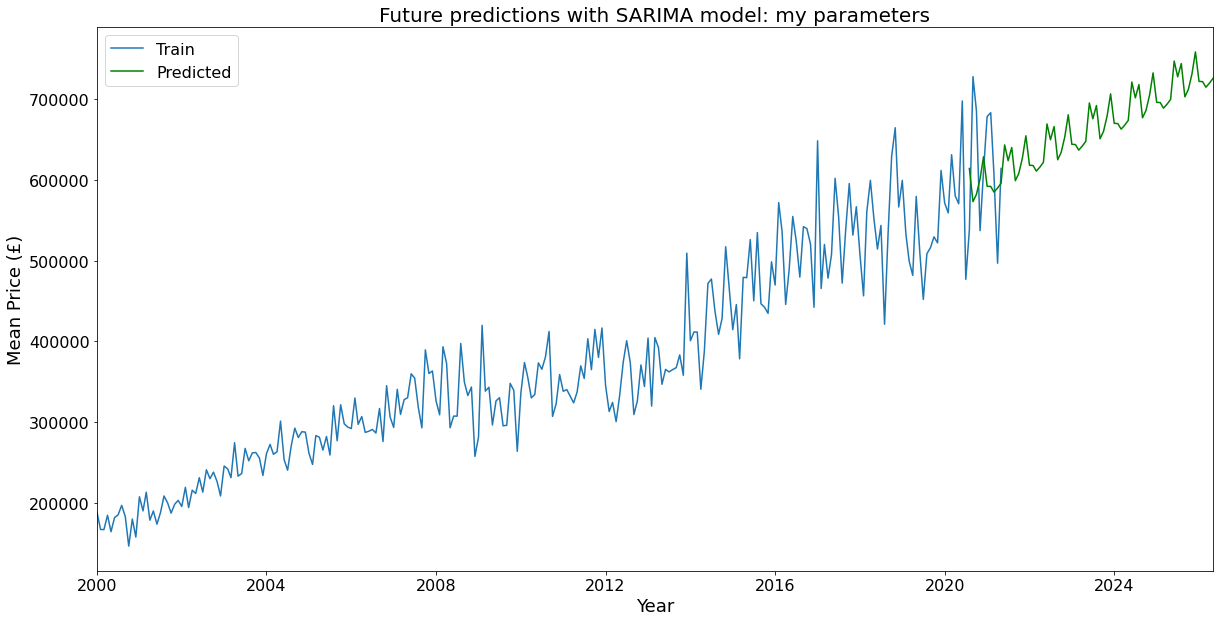

In [178]:
#Creating a test date set of future dates
br1_test_future=br1_sar_test
br1_test_future.index=br1_test_future.index+pd.DateOffset(years=5)
y_hat_avg_future = br1_test_future.copy()
fit_future = sm.tsa.statespace.SARIMAX(br1_sar, order=(0, 1, 1),seasonal_order=(1,1,1,12)).fit()
y_hat_avg_future['SARIMA'] = fit2.predict(start=br1_test_future.index[0],end=br1_test_future.index[-1])
plt.figure(figsize=(20,10))
plt.plot( br1_sar, label='Train')
plt.plot(y_hat_avg_future['SARIMA'], label='Predicted', color='g')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([br1_sar_train.index[0], br1_test_future.index[-1]]))
plt.ylabel("Mean Price (£)", fontsize='18')
plt.title("Future predictions with SARIMA model: my parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [192]:
# Plug the optimal parameter values into a new SARIMAX model
model = sm.tsa.statespace.SARIMAX(diff,order=(0,1,1),seasonal_order=(1,1,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

# Fit the model and print results
output = model.fit()

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [193]:
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    443.843     -0.002      0.998    -870.916     868.916
ar.S.L12      -0.2753      0.072     -3.850      0.000      -0.415      -0.135
ma.S.L12      -0.8422      0.063    -13.320      0.000      -0.966      -0.718
sigma2         0.0482     21.394      0.002      0.998     -41.883      41.979


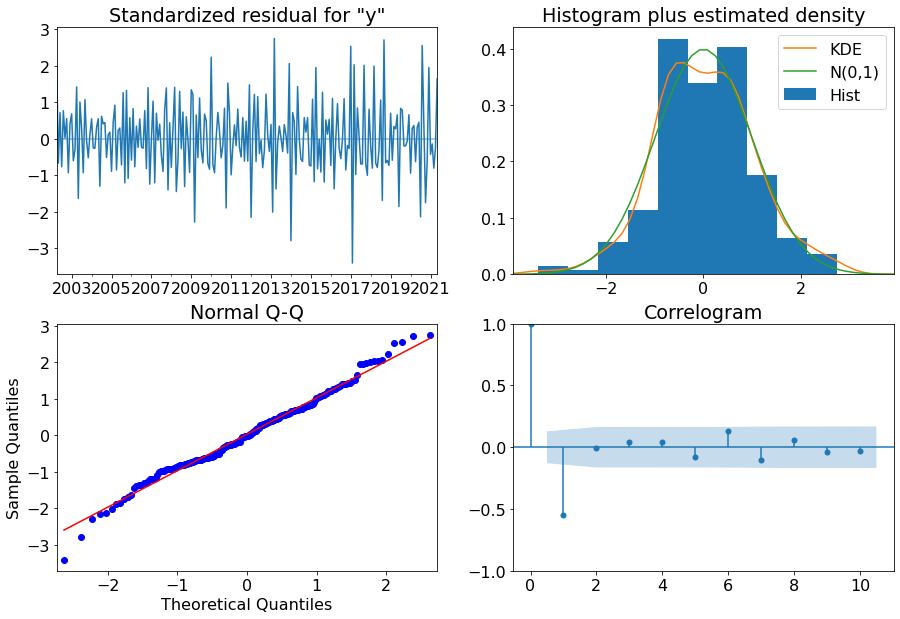

In [194]:
# Call plot_diagnostics() on the results calculated above 
fig=output.plot_diagnostics(figsize=(15,10))

# One Step Ahead

In [195]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

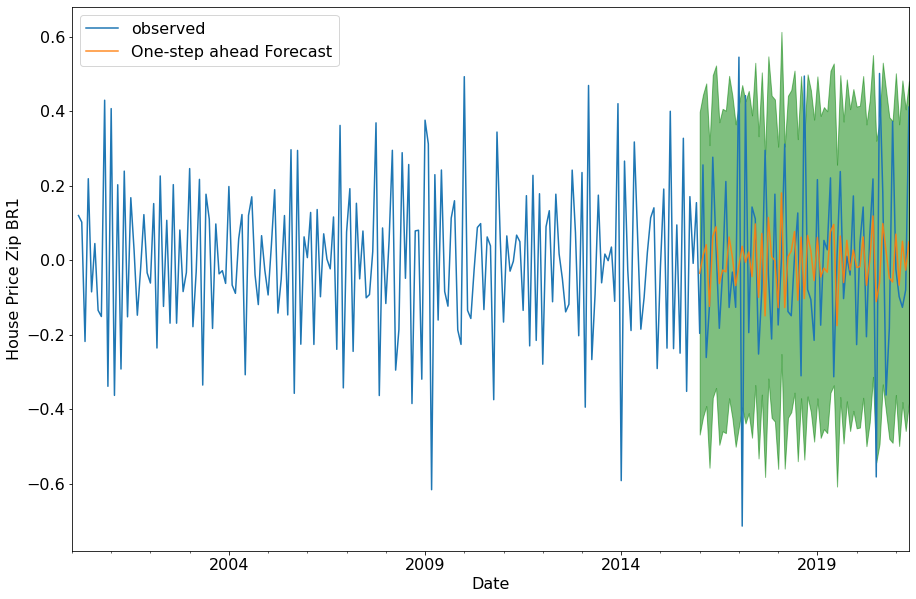

In [196]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Plot observed values
ax = diff['2000':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Price Zip BR1')
plt.legend()

plt.show()

In [197]:
# Get the real and predicted values
br1_forecasted = pred.predicted_mean
br1_truth = diff['2000-01-01':]

# Compute the mean square error
mse = ((br1_forecasted - br1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [198]:
error = np.sqrt(mse)
error

0.25530110281271395

1.2908502410010048

In [199]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_history=True)
pred_dynamic_conf = pred_dynamic.conf_int()

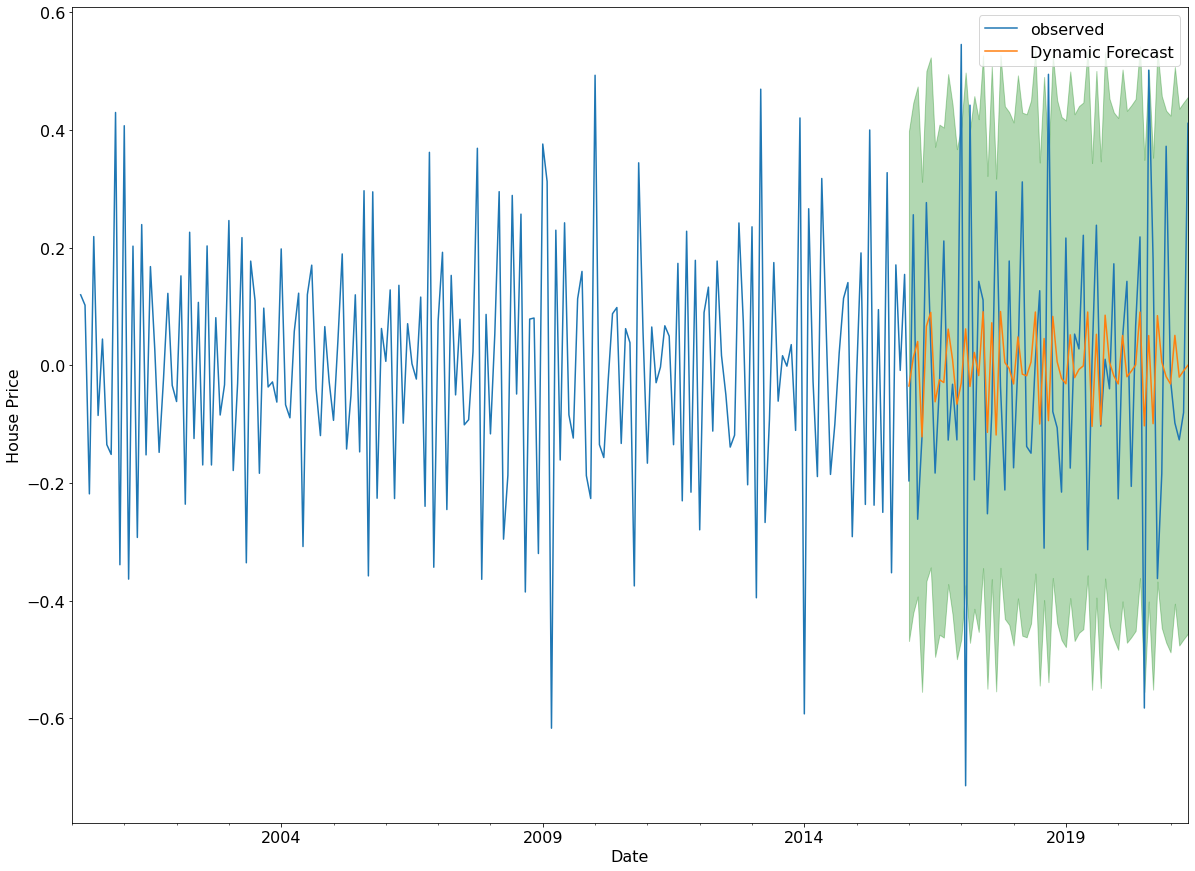

In [202]:
# Plot the dynamic forecast with confidence intervals as above
ax = diff['2000':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

#ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), br1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Price')

plt.legend()

In [204]:
diff

ds
2000-01-01         NaN
2000-02-01         NaN
2000-03-01    0.120108
2000-04-01    0.102441
2000-05-01   -0.218231
                ...   
2021-01-01   -0.024128
2021-02-01   -0.097637
2021-03-01   -0.126482
2021-04-01   -0.080004
2021-05-01    0.411553
Name: y, Length: 257, dtype: float64

In [360]:
list_of_zips = list(df1['zip'].unique())
list_of_zips.remove('CM14')
list_of_zips.remove('EC2N')

In [316]:
# Define table as a dataframe with specific columns. Each column's values will be a list that we will add to.
list_of_zips = list(df1['zip'].unique())
summary = pd.DataFrame({'Zip': [], 'Test MPE':[]})


summary

,Zip,Test MPE


In [330]:

for x,i in enumerate(list_of_zips):
    df = df1[df1['zip']==i].copy()
    df.drop('zip', axis=1, inplace=True)
    df.columns = ['ds', 'y']
    df.set_index('ds', inplace=True)
    df = df.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)
    train_df = df[df.index < '2017-12-01']
    test_df = df[(df.index >= '2017-12-01') & (df.index < '2019-01-01')]
    val_df = df[(df.index >= '2019-01-01') & (df.index < '2021-05-01')]
    cbrt_train = np.cbrt(df)
    arimamodel = SARIMAX(cbrt_train, order = (4,1,2), seasonal_order = (1,1,0,12))
    fit_model = arimamodel.fit()
    yhat = fit_model.forecast(len(test_df))
    # undo the cube root in order to compare to the test data
    yhat = yhat**3
    mpe = mean_percent_error(test_df,yhat)
    summary.loc[x] = [i, mpe]

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Andrew\anacon

ValueError: Prediction must have `end` after `start`.

In [318]:
summary

,Zip,Test MPE
0,BR1,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...
1,BR2,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...
2,BR3,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...
3,BR4,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...
4,BR5,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...
5,BR6,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...
6,BR7,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...
7,BR8,2020-11-01 00:00:00 0.0 2020-12-01 00:00:00...
8,CM13,2018-04-01 00:00:00 0.0 2018-05-01 00:00:00...
9,CR0,2021-06-01 00:00:00 0.0 2021-07-01 00:00:00...


In [ ]:
for x,i in enumerate(list_of_zips):
    df = df1[df1['zip']==i].copy()
    if len(df) < 257:
        continue
    #print(df.head())
    df.drop('zip', axis=1, inplace=True)
    #print(df.head())
    df.columns = ['ds', 'y']
    df.set_index('ds', inplace=True)
    df = df['y']
    df = df.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)
    print(i)
    print(df.head())
    train_df = df[df.index < '2017-12-01']
    test_df = df[(df.index >= '2017-12-01') & (df.index < '2019-01-01')]
    val_df = df[(df.index >= '2019-01-01') & (df.index < '2021-05-01')]
    cbrt_train = np.cbrt(train_df)
    arimamodel = SARIMAX(cbrt_train, order = (4,1,2), seasonal_order = (1,1,0,12), freq='MS')
    fit_model = arimamodel.fit()
    yhat = fit_model.forecast(len(test_df))
    # undo the cube root in order to compare to the test data
    yhat = yhat**3
    mpe = mean_percent_error(test_df,yhat)
    summary.loc[x] = [i, mpe]
    print('simple arima mean percent error: ', mpe)
    plt.figure(figsize=(20,10))
    plt.plot(yhat, label = 'Prediction')
    plt.plot(df[df.index < '2019-01-01'], label = 'True')
    plt.legend()
    plt.savefig('{}.png'.format(i), bbox_inches = 'tight')
    

In [346]:
summary.sort_values(by='mpe', ascending=False)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [352]:
summary['mpe'].astype(int)

ValueError: setting an array element with a sequence.

In [ ]:
IDEA - top 5, top 5 worst,low medium high risk, low medium high return
user input budget, 

In [353]:
summary.head(50)

,zip,mpe
0,BR1,0.123844
1,BR2,0.102355
2,BR3,0.123614
3,BR4,0.228745
4,BR5,0.0753263
5,BR6,0.084625
6,BR7,0.173382
7,BR8,0.0697984
8,CM13,0.00688681
9,CR0,0.0825456


In [359]:
pd.set_option('display.max_rows', None)
print(summary)

      zip                                                mpe
0     BR1                                           0.123844
1     BR2                                           0.102355
2     BR3                                           0.123614
3     BR4                                           0.228745
4     BR5                                          0.0753263
5     BR6                                           0.084625
6     BR7                                           0.173382
7     BR8                                          0.0697984
8    CM13                                         0.00688681
9     CR0                                          0.0825456
10    CR2                                          0.0822733
11    CR3                                           0.140802
12    CR4                                           0.210425
13    CR5                                           0.088726
14    CR6                                            1.85148
15    CR7               

In [361]:
summary_final = summary[summary['zip']!='EC2N'].copy()

In [362]:
summary_final.sort_values(by='mpe')

,zip,mpe
8,CM13,0.00688681
26,DA7,0.0315665
151,RM5,0.0555726
42,E4,0.0606925
155,RM9,0.0618871
188,SM5,0.064045
79,HA4,0.0668156
144,RM12,0.0668327
180,SE6,0.0677142
197,SW15,0.0694447


In [363]:
len(summary_final)

227

In [343]:
summary.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
test3 = df[(df.index >= '2017-12-01') & (df.index < '2019-01-01')]

In [306]:
cm14 = df1[df1['zip']=='CM14'].copy()
cm14.drop('zip', axis=1, inplace=True)
cm14.columns = ['ds', 'y']
cm14 = cm14.set_index('ds')
cm14 = cm14['y']
cm14 = cm14.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)
cm14

ds
2003-12-01    710000.000000
2004-01-01    712036.124795
2004-02-01    714072.249589
2004-03-01    715977.011494
2004-04-01    718013.136289
2004-05-01    719983.579639
2004-06-01    722019.704433
2004-07-01    723990.147783
2004-08-01    726026.272578
2004-09-01    728062.397373
2004-10-01    730032.840722
2004-11-01    732068.965517
2004-12-01    734039.408867
2005-01-01    736075.533662
2005-02-01    738111.658456
2005-03-01    739950.738916
2005-04-01    741986.863711
2005-05-01    743957.307061
2005-06-01    745993.431856
2005-07-01    747963.875205
2005-08-01    750000.000000
Name: y, dtype: float64

In [308]:
train_cm14 = df[df.index < '2017-12-01']
test_cm14 = df[(df.index >= '2017-12-01') & (df.index < '2019-01-01')]
val_cm14 = df[(df.index >= '2019-01-01') & (df.index < '2021-05-01')]
cbrt_cm14 = np.cbrt(train_cm14)
arimamodel = SARIMAX(cbrt_cm14, order = (4,1,2), seasonal_order = (1,1,0,12), freq='MS')
fit_model = arimamodel.fit()
yhat = fit_model.forecast(len(test_cm14))
# undo the cube root in order to compare to the test data
yhat = yhat**3
mpe = mean_percent_error(test_cm14,yhat)

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



LinAlgError: Schur decomposition solver error.

In [310]:
train_cm14

ds
2003-12-01    710000.000000
2004-01-01    712036.124795
2004-02-01    714072.249589
2004-03-01    715977.011494
2004-04-01    718013.136289
2004-05-01    719983.579639
2004-06-01    722019.704433
2004-07-01    723990.147783
2004-08-01    726026.272578
2004-09-01    728062.397373
2004-10-01    730032.840722
2004-11-01    732068.965517
2004-12-01    734039.408867
2005-01-01    736075.533662
2005-02-01    738111.658456
2005-03-01    739950.738916
2005-04-01    741986.863711
2005-05-01    743957.307061
2005-06-01    745993.431856
2005-07-01    747963.875205
2005-08-01    750000.000000
Name: y, dtype: float64

In [312]:
test_cm14

Series([], Name: y, dtype: float64)

In [321]:
ec2n = df1[df1['zip']=='EC2N'].copy()

In [328]:
ec2n = df1[df1['zip']=='CM14'].copy()
ec2n.drop('zip', axis=1, inplace=True)
ec2n.columns = ['ds', 'y']
ec2n = ec2n.set_index('ds')
ec2n = ec2n['y']
ec2n = ec2n.interpolate(method = 'time', limit_direction = 'forward', limit_area = 'inside').fillna(0)
ec2n.tail()

ds
2005-04-01    741986.863711
2005-05-01    743957.307061
2005-06-01    745993.431856
2005-07-01    747963.875205
2005-08-01    750000.000000
Name: y, dtype: float64

In [325]:
train_ec2n = ec2n[ec2n.index < '2017-12-01']

In [326]:
test_ec2n = ec2n[(ec2n.index >= '2017-12-01') & (ec2n.index < '2019-01-01')]

In [327]:
test_ec2n

Series([], Name: y, dtype: float64)

In [332]:
len(br1)

257